### K√úT√úPHANELERƒ∞N Y√úKLENMESƒ∞

In [58]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# Matplotlib T√ºrk√ße karakter desteƒüi
plt.rcParams["font.family"] = "DejaVu Sans"

#### Gƒ∞Rƒ∞≈û Bƒ∞LGƒ∞Sƒ∞

In [59]:

print("###############################################################")
print("#   √úSK√úDAR √úNƒ∞VERSƒ∞TESƒ∞ FEN Bƒ∞Lƒ∞MLERƒ∞ ENSTƒ∞T√úS√ú              #")
print("#   MAKƒ∞NE √ñƒûRENMESƒ∞ - ARA SINAV √ñDEVƒ∞                        #")
print("#                                                             #")
print("#   KURU FASULYE VERƒ∞ SETƒ∞ √úZERƒ∞NDE MAKƒ∞NE √ñƒûRENMESƒ∞          #")
print("#   PREPROCESSING, FEATURE EXTRACTION VE MODEL EVALUATION      #")
print("###############################################################")

###############################################################
#   √úSK√úDAR √úNƒ∞VERSƒ∞TESƒ∞ FEN Bƒ∞Lƒ∞MLERƒ∞ ENSTƒ∞T√úS√ú              #
#   MAKƒ∞NE √ñƒûRENMESƒ∞ - ARA SINAV √ñDEVƒ∞                        #
#                                                             #
#   KURU FASULYE VERƒ∞ SETƒ∞ √úZERƒ∞NDE MAKƒ∞NE √ñƒûRENMESƒ∞          #
#   PREPROCESSING, FEATURE EXTRACTION VE MODEL EVALUATION      #
###############################################################


#### Ana Ama√ß
Ana hedef, fasulye √ße≈üitliliƒüi i√ßindeki doƒüal √∂r√ºnt√ºleri kategorize etmek ve anlamaktƒ±r. Makine √∂ƒürenimi algoritmalarƒ±nƒ± kullanarak, alan, √ßevre ve ≈üekil gibi √∂zelliklere dayalƒ± olarak fasulyeler arasƒ±ndaki doƒüal gruplandƒ±rmalarƒ± ve ili≈ükileri belirlemeyi hedefliyoruz.

### VERƒ∞ SETƒ∞Nƒ∞N Y√úKLENMESƒ∞ VE EDA-KE≈ûƒ∞FSEL VERƒ∞ ANALƒ∞Zƒ∞

In [60]:
print("\n1. VERƒ∞ SETƒ∞Nƒ∞N Y√úKLENMESƒ∞ VE KE≈ûƒ∞FSEL ANALƒ∞Zƒ∞")
print("------------------------------------------------")
print("Birle≈ümi≈ü Milletler Gƒ±da ve Tarƒ±m √ñrg√ºt√º'ne (FAO) g√∂re, fasulye d√ºnya genelinde 400 milyondan fazla")
print("insanƒ±n temel besin kaynaƒüƒ±dƒ±r. Sadece ABD'de, 1.5 milyon akrelik arazide fasulye yeti≈ütirilmekte ve")
print("yƒ±llƒ±k 2.2 milyar pound fasulye √ºretilmektedir.")
print("\nBu √ßalƒ±≈ümada, 7 farklƒ± kuru fasulye t√ºr√ºn√º sƒ±nƒ±flandƒ±rmak i√ßin makine √∂ƒürenmesi pipeline'ƒ± geli≈ütirilecektir.")

df = pd.read_excel("Dry_Bean_Dataset.xlsx")

print(f"\nVeri seti boyutu: {df.shape}")



1. VERƒ∞ SETƒ∞Nƒ∞N Y√úKLENMESƒ∞ VE KE≈ûƒ∞FSEL ANALƒ∞Zƒ∞
------------------------------------------------
Birle≈ümi≈ü Milletler Gƒ±da ve Tarƒ±m √ñrg√ºt√º'ne (FAO) g√∂re, fasulye d√ºnya genelinde 400 milyondan fazla
insanƒ±n temel besin kaynaƒüƒ±dƒ±r. Sadece ABD'de, 1.5 milyon akrelik arazide fasulye yeti≈ütirilmekte ve
yƒ±llƒ±k 2.2 milyar pound fasulye √ºretilmektedir.

Bu √ßalƒ±≈ümada, 7 farklƒ± kuru fasulye t√ºr√ºn√º sƒ±nƒ±flandƒ±rmak i√ßin makine √∂ƒürenmesi pipeline'ƒ± geli≈ütirilecektir.

Veri seti boyutu: (13611, 17)


In [61]:
df.head() # ilk 5 veri

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [62]:
df.sample(10) # rastgele 10 √∂rnek.

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
12411  34248    693.987       268.956189       162.350167      1.656643   
12590  34951    694.086       257.090664       173.330663      1.483238   
531    36565    691.737       242.283745       192.328492      1.259739   
2792   71475   1051.294       378.284523       241.795075      1.564484   
1943   49363    816.683       280.621641       224.289272      1.251159   
1688   44466    760.049       269.483616       210.268173      1.281619   
11455  30471    655.561       247.903301       156.845945      1.580553   
8245   42348    775.415       288.483371       187.629638      1.537515   
4242   68634   1007.249       385.360999       229.423820      1.679690   
13415  39823    725.562       260.318756       195.118759      1.334155   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
12411      0.797264       34549     208.820277  0.714766  0.991288   0.893598   
12590      0.738548       35319     210.952590  0.733171  0.989581   0.911681   
531        0.608159       36892     215.768404  0.752057  0.991136   0.960270   
2792       0.769050       72499     301.670013  0.783168  0.985876   0.812673   
1943       0.600987       49830     250.700865  0.753507  0.990628   0.930046   
1688       0.625451       44807     237.940895  0.770534  0.992390   0.967286   
11455      0.774405       30957     196.969242  0.761508  0.984301   0.890985   
8245       0.759592       42959     232.204970  0.694138  0.985777   0.885063   
4242       0.803468       70059     295.613807  0.724431  0.979660   0.850111   
13415      0.661961       40183     225.175972  0.763010  0.991041   0.950593   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
12411     0.776410      0.007853      0.001760      0.602812      0.998645   
12590     0.820538      0.007356      0.002057      0.673282      0.998638   
531       0.890561      0.006626      0.002571      0.793099      0.999097   
2792      0.797469      0.005293      0.001320      0.635956      0.994943   
1943      0.893377      0.005685      0.002234      0.798122      0.998578   
1688      0.882951      0.006060      0.002272      0.779603      0.999154   
11455     0.794541      0.008136      0.002000      0.631295      0.997795   
8245      0.804916      0.006812      0.001764      0.647890      0.996141   
4242      0.767109      0.005615      0.001199      0.588456      0.988424   
13415     0.865001      0.006537      0.002257      0.748227      0.998251   

          Class  
12411  DERMASON  
12590  DERMASON  
531       SEKER  
2792   BARBUNYA  
1943      SEKER  
1688      SEKER  
11455  DERMASON  
8245       SIRA  
4242       CALI  
13415  DERMASON

In [63]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

#### Veri Seti Analizi

Yukarƒ±daki bilgilere dayanarak, veri seti hakkƒ±nda ≈üu √ßƒ±karƒ±mlarƒ± yapabiliriz:

* **Veri √ñzellikleri:** Veri seti, fasulye tanelerinin alan, √ßevre, eksen uzunluklarƒ±, en-boy oranƒ±, dƒ±≈ü merkezlilik, dƒ±≈üb√ºkeylik ve yuvarlaklƒ±k gibi √ße≈üitli √∂zelliklerini i√ßermektedir. Bu √∂zellikler, belirli bir taneyi spesifik bir fasulye t√ºr√ºne sƒ±nƒ±flandƒ±rmada √∂nemli bilgi kaynaƒüƒ±dƒ±r.

* **Veri Tamlƒ±ƒüƒ±:** 'Non-Null Count' s√ºtununun g√∂sterdiƒüi gibi veri setinde eksik deƒüer bulunmamaktadƒ±r. Bu, ara≈ütƒ±rmamƒ±zda eksik veya tamamlanmamƒ±≈ü kayƒ±tlar i√ßin veri temizleme ihtiyacƒ±nƒ± ortadan kaldƒ±rƒ±r. (Ancak √∂dev kapsamƒ±nda yapay olarak eksik deƒüerler ekleyerek veri √∂n i≈üleme tekniklerini uygulayacaƒüƒ±z.)

* **Veri Tipleri:** Veri setinin √ßoƒüunluƒüu sayƒ±sal verilerden olu≈üurken, yalnƒ±zca 'Class' √∂zelliƒüi fasulye kategorisini i√ßeren kategorik bir deƒüi≈ükendir.

Bu analizler ƒ±≈üƒ±ƒüƒ±nda, veri setinin makine √∂ƒürenmesi modelleri i√ßin uygun olduƒüunu ve √ße≈üitli sƒ±nƒ±flandƒ±rma algoritmalarƒ± ile fasulye t√ºrlerini ba≈üarƒ±yla ayƒ±rt edebileceƒüimizi √∂ng√∂rebiliriz.

In [65]:
# Sƒ±nƒ±f daƒüƒ±lƒ±mƒ±
class_distribution = df['Class'].value_counts()

class_distribution

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Veri setinde dengeli olmayan (unbalanced) bir sƒ±nƒ±f daƒüƒ±lƒ±mƒ± olduƒüu g√∂r√ºlmektedir. DERMASON t√ºr√º en y√ºksek √∂rnek sayƒ±sƒ±na sahipken (3546), BOMBAY t√ºr√º en d√º≈ü√ºk √∂rnek sayƒ±sƒ±na sahiptir (522).
En √ßok √∂rneƒüe sahip sƒ±nƒ±f (DERMASON) ile en az √∂rneƒüe sahip sƒ±nƒ±f (BOMBAY) arasƒ±nda yakla≈üƒ±k 7 katlƒ±k bir fark vardƒ±r.
Bu dengesizlik, model eƒüitimi sƒ±rasƒ±nda sƒ±nƒ±flandƒ±rma performansƒ±nƒ± etkileyebilir. √ñzellikle model, √∂rnek sayƒ±sƒ± daha fazla olan DERMASON sƒ±nƒ±fƒ±na yanlƒ±lƒ±k g√∂sterebilir ve √∂rnek sayƒ±sƒ± az olan BOMBAY sƒ±nƒ±fƒ±nƒ± tanƒ±makta zorlanabilir.
Bu dengesizliƒüi ele almak i√ßin ≈üu teknikler d√º≈ü√ºn√ºlebilir:

Sƒ±nƒ±f aƒüƒ±rlƒ±klandƒ±rma (class weighting)
Veri √ßoƒüaltma (data augmentation)
SMOTE gibi oversampling teknikleri
Undersampling teknikleri



Ancak bu √∂dev kapsamƒ±nda, sƒ±nƒ±f dengesizliƒüine raƒümen modellerin performansƒ±nƒ± deƒüerlendirmek ve nested cross-validation ile bu etkiyi azaltmak ama√ßlanmaktadƒ±r.

### Veri G√∂rselle≈ütirme - Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±

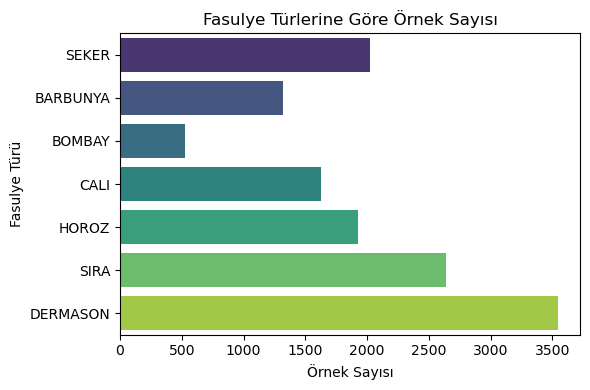

In [87]:
 # Sƒ±nƒ±f daƒüƒ±lƒ±mƒ±nƒ± g√∂rselle≈ütirme
plt.figure(figsize=(6, 4))
sns.countplot(y='Class', data=df, palette='viridis')
plt.title('Fasulye T√ºrlerine G√∂re √ñrnek Sayƒ±sƒ±')
plt.xlabel('√ñrnek Sayƒ±sƒ±')
plt.ylabel('Fasulye T√ºr√º')
plt.tight_layout()
plt.show()


### Temel ƒ∞statistikler ve √ñzellik Daƒüƒ±lƒ±mlarƒ±

In [88]:
# ƒ∞statistiksel bilgiler
df.describe().T

count          mean           std           min  \
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13611.0    320.141867     85.694186    183.601165   
MinorAxisLength  13611.0    202.270714     44.970091    122.512653   
AspectRation     13611.0      1.583242      0.246678      1.024868   
Eccentricity     13611.0      0.750895      0.092002      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13611.0      0.987143      0.004660      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13611.0      0.799864      0.061713      0.640577   
ShapeFactor1     13611.0      0.006564      0.001128      0.002778   
ShapeFactor2     13611.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           75%            max  
Area             36328.000000  44652.000000  61332.000000  254616.000000  
Perimeter          703.523500    794.941000    977.213000    1985.370000  
MajorAxisLength    253.303633    296.883367    376.495012     738.860153  
MinorAxisLength    175.848170    192.431733    217.031741     460.198497  
AspectRation         1.432307      1.551124      1.707109       2.430306  
Eccentricity         0.715928      0.764441      0.810466       0.911423  
ConvexArea       36714.500000  45178.000000  62294.000000  263261.000000  
EquivDiameter      215.068003    238.438026    279.446467     569.374358  
Extent               0.718634      0.759859      0.786851       0.866195  
Solidity             0.985670      0.988283      0.990013       0.994677  
roundness            0.832096      0.883157      0.916869       0.990685  
Compactness          0.762469      0.801277      0.834270       0.987303  
ShapeFactor1         0.005900      0.006645      0.007271       0.010451  
ShapeFactor2         0.001154      0.001694      0.002170       0.003665  
ShapeFactor3         0.581359      0.642044      0.696006       0.974767  
ShapeFactor4         0.993703      0.996386      0.997883       0.999733

√ñl√ßekleme ƒ∞htiyacƒ±: √ñzelliklerin deƒüer aralƒ±klarƒ± arasƒ±nda b√ºy√ºk farklƒ±lƒ±klar olduƒüundan, makine √∂ƒürenmesi modellerinden √∂nce standartla≈ütƒ±rma veya normalizasyon gereklidir.
√ñzellik Se√ßimi: Bu kadar √ßok √∂zellik arasƒ±nda, PCA ve LDA gibi boyut indirgeme tekniklerinin uygulanmasƒ±, veri temsilini daha kompakt hale getirebilir.
√ñzellik Korelasyonu: Alan, √ßevre ve eksen uzunluklarƒ± gibi bazƒ± √∂zellikler arasƒ±nda muhtemelen y√ºksek korelasyon vardƒ±r. Bu ili≈ükiler korelasyon analizi veya VIF (Variance Inflation Factor) ile incelenmelidir.

Bu temel istatistikler, fasulye t√ºrlerinin boyut ve ≈üekil a√ßƒ±sƒ±ndan √∂nemli √∂l√ß√ºde farklƒ±la≈ütƒ±ƒüƒ±nƒ± g√∂steriyor, bu da makine √∂ƒürenmesi sƒ±nƒ±flandƒ±rma modellerinin ba≈üarƒ±lƒ± olma potansiyeline i≈üaret ediyor.

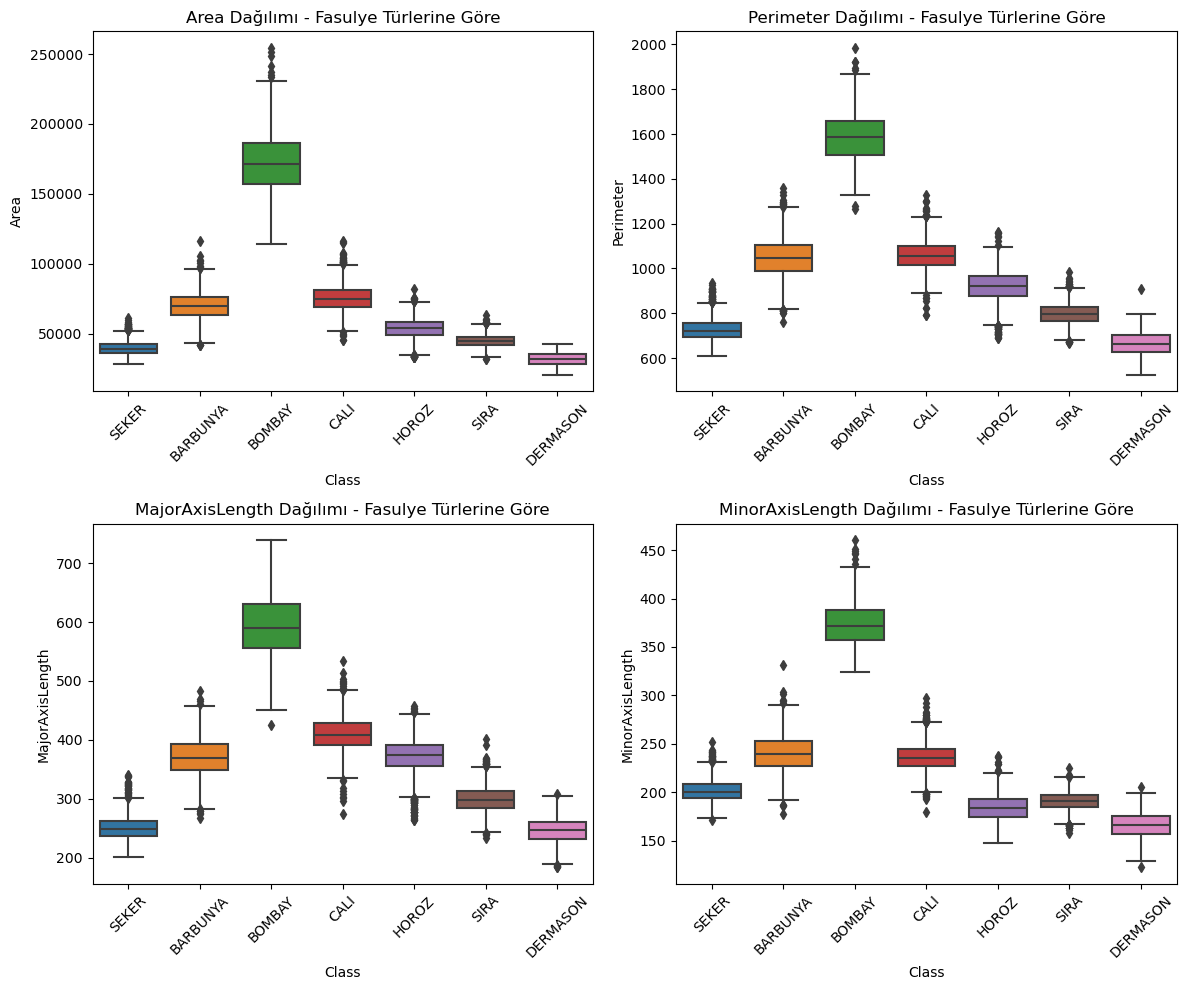

In [68]:
# √ñznitelikler ve hedef deƒüi≈üken arasƒ±ndaki ili≈ükileri inceleme
plt.figure(figsize=(12, 10))
for i, feature in enumerate(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} Daƒüƒ±lƒ±mƒ± - Fasulye T√ºrlerine G√∂re')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


√ñzellikle 4 temel √∂zellik (Alan, √áevre, Ana Eksen ve Yan Eksen Uzunluklarƒ±) a√ßƒ±sƒ±ndan t√ºrler arasƒ±ndaki farklƒ±lƒ±klar dikkat √ßekicidir:
Alan (Area) Daƒüƒ±lƒ±mƒ±:

* BOMBAY t√ºr√º, diƒüer t√ºrlere g√∂re a√ßƒ±k ara en b√ºy√ºk alana sahip (median ~175,000 birim¬≤)
* DERMASON en k√º√ß√ºk alana sahip (median ~30,000 birim¬≤)
* BARBUNYA, CALI ve HOROZ orta b√ºy√ºkl√ºkte alanlar g√∂steriyor

√áevre (Perimeter) Daƒüƒ±lƒ±mƒ±:

* BOMBAY en uzun √ßevreye sahip (median ~1600 birim)
* DERMASON ve SEKER en kƒ±sa √ßevreye sahip (median ~650-750 birim)
* BARBUNYA ve CALI benzer √ßevre uzunluklarƒ±na sahip

Ana Eksen Uzunluƒüu (MajorAxisLength) Daƒüƒ±lƒ±mƒ±:

* Yine BOMBAY en uzun ana eksene sahip (median ~600 birim)
* DERMASON ve SEKER en kƒ±sa ana eksene sahip
* Diƒüer t√ºrler ara deƒüerlerde ve birbirlerinden ayrƒ±labilir durumda

Yan Eksen Uzunluƒüu (MinorAxisLength) Daƒüƒ±lƒ±mƒ±:

* BOMBAY t√ºr√º en geni≈ü (median ~370 birim)
* DERMASON en dar yapƒ±da (median ~170 birim)

Genel G√∂zlemler:

* Ayƒ±rt Edici T√ºrler: BOMBAY ve DERMASON, boyut √∂zellikleri a√ßƒ±sƒ±ndan diƒüer t√ºrlerden belirgin ≈üekilde ayrƒ±lƒ±yor
* Sƒ±nƒ±flandƒ±rma Potansiyeli: Bu fiziksel √∂zelliklerin, fasulye t√ºrlerini sƒ±nƒ±flandƒ±rmada olduk√ßa etkili olabileceƒüi g√∂r√ºl√ºyor
* Varyans D√ºzeyi: Her t√ºr i√ßinde √∂zellik deƒüerlerinde farklƒ± d√ºzeylerde varyasyon g√∂r√ºl√ºyor; bazƒ± t√ºrler daha homojen (DERMASON), bazƒ±larƒ± daha heterojen (CALI)

Bu g√∂rsel analiz, makine √∂ƒürenmesi modellerinin fasulye t√ºrlerini ayƒ±rt etmede ba≈üarƒ±lƒ± olabileceƒüini g√∂steriyor, √ß√ºnk√º t√ºrler arasƒ±nda belirgin fiziksel farklƒ±lƒ±klar mevcut.

### Korelasyon Analizi

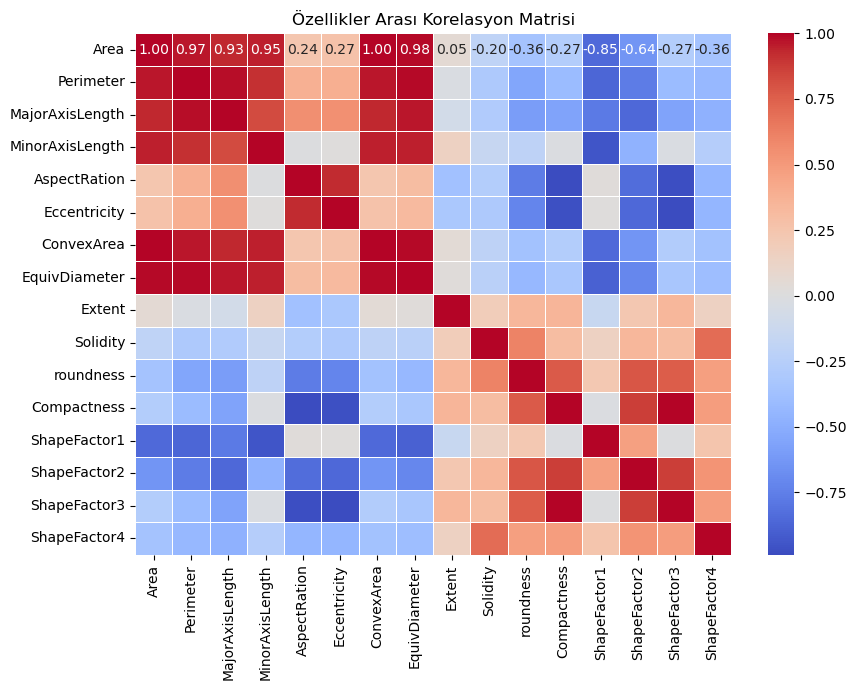

In [69]:
# √ñzellikler arasƒ± korelasyon analizi
correlation_matrix = df.drop('Class', axis=1).corr()

# Korelasyon matrisini g√∂rselle≈ütirme
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('√ñzellikler Arasƒ± Korelasyon Matrisi')
plt.tight_layout()
plt.show()


Kƒ±rmƒ±zƒ± tonlar pozitif korelasyonu, mavi tonlar negatif korelasyonu ifade eder.

* √ñnemli Korelasyon Gruplarƒ±:

* Boyut √ñl√ß√ºleri Grubu (Y√ºksek Pozitif Korelasyon):

Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea ve EquivDiameter √∂zellikleri arasƒ±nda √ßok y√ºksek pozitif korelasyon (0.93-1.00) g√∂r√ºlmektedir.
Bu √∂zellikler fasulye tanelerinin genel boyutuyla ilgilidir ve birbirleriyle doƒüal olarak ili≈ükilidir.
Bu y√ºksek korelasyon, boyut √∂l√ß√ºm √∂zelliklerinde belirgin bir √ßoklu doƒürusallƒ±k (multicollinearity) olduƒüunu g√∂sterir.

* ≈ûekil √ñl√ß√ºleri Grubu:

AspectRatio ve Eccentricity arasƒ±nda g√º√ßl√º pozitif korelasyon (0.91) vardƒ±r - her ikisi de fasulye ≈üeklinin oval/uzunluk √∂zelliklerini √∂l√ßer.
Roundness, Compactness ve ShapeFactor √∂zellikleri arasƒ±nda orta-y√ºksek pozitif korelasyonlar g√∂r√ºlmektedir.

* Boyut ve ≈ûekil Arasƒ±ndaki Negatif ƒ∞li≈ükiler:

Boyut √∂l√ß√ºleri (Area, Perimeter) ile ≈üekil √∂l√ß√ºleri (Roundness, Compactness) arasƒ±nda orta d√ºzeyde negatif korelasyonlar (-0.2 ile -0.4 arasƒ±) vardƒ±r.
Bu, b√ºy√ºk fasulyelerin genel olarak daha az dairesel/kompakt olma eƒüiliminde olduƒüunu g√∂sterir.

* ShapeFactor √ñzellikleri:

ShapeFactor1-4 √∂zellikleri kendi aralarƒ±nda pozitif korelasyonlar g√∂sterirken, boyut √∂l√ß√ºleriyle negatif korelasyonlar g√∂sterirler.
√ñzellikle ShapeFactor2 ve ShapeFactor4, diƒüer ≈üekil fakt√∂rleriyle g√º√ßl√º ili≈ükiler sergiler.

* Makine √ñƒürenmesi ƒ∞√ßin √áƒ±karƒ±mlar:

* Boyut ƒ∞ndirgeme Potansiyeli: Y√ºksek korelasyonlu √∂zellikler, PCA gibi boyut indirgeme tekniklerinin etkili olabileceƒüini g√∂sterir - √∂zellikle boyut √∂l√ß√ºm √∂zellikleri i√ßin.
* √ñzellik Se√ßimi: T√ºm boyut √∂zelliklerini (Area, Perimeter vb.) kullanmak yerine, aralarƒ±ndan sadece 1-2 tanesini se√ßmek yeterli olabilir.
* √áoklu Doƒürusallƒ±k: Bu kadar y√ºksek korelasyonlu √∂zellikler, Logistic Regression gibi bazƒ± modellerde sorun yaratabilir.
* Bilgi √áe≈üitliliƒüi: Veri setinde hem boyut hem de ≈üekil √∂zellikleri bulunduƒüundan, farklƒ± t√ºrdeki fasulyeleri ayƒ±rt etmek i√ßin tamamlayƒ±cƒ± bilgiler saƒülanmaktadƒ±r.

 Bu korelasyon analizi, fasulye t√ºrlerini sƒ±nƒ±flandƒ±rƒ±rken hangi √∂zelliklerin benzer bilgiler ta≈üƒ±dƒ±ƒüƒ±nƒ± ve hangi √∂zellik gruplarƒ±nƒ±n birbirinden baƒüƒ±msƒ±z olduƒüunu anlamamƒ±za yardƒ±mcƒ± olur. PCA uygulamasƒ±nƒ±n bu veri seti i√ßin mantƒ±klƒ± olduƒüunu teyit etmektedir.

#### Ek not (√áoklu Doƒürusallƒ±k)

√áoklu doƒürusallƒ±k (multicollinearity), bir istatistiksel model veya makine √∂ƒürenmesi modelinde, baƒüƒ±msƒ±z deƒüi≈ükenler (√∂zellikler) arasƒ±nda y√ºksek korelasyon olmasƒ± durumudur. 

Bu durumda, boyut √∂l√ß√ºleri grubu (Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea ve EquivDiameter) arasƒ±ndaki korelasyonlarƒ±n 0.93-1.00 gibi √ßok y√ºksek deƒüerlerde olmasƒ±, bu deƒüi≈ükenlerin birbirleriyle √ßok g√º√ßl√º ili≈ükili olduƒüunu g√∂steriyor.

√áoklu doƒürusallƒ±ƒüƒ±n etkileri:

1. **Model yorumlanabilirliƒüini zorla≈ütƒ±rƒ±r**: Y√ºksek korelasyonlu deƒüi≈ükenler, bir deƒüi≈ükenin etkisini diƒüerinden ayƒ±rt etmeyi zorla≈ütƒ±rƒ±r.

2. **Bazƒ± algoritmalarda kararsƒ±zlƒ±k yaratƒ±r**: √ñzellikle doƒürusal regresyon veya lojistik regresyon gibi modellerde, √ßoklu doƒürusallƒ±k parametre tahminlerini kararsƒ±z hale getirebilir.

3. **Gereksiz hesaplama y√ºk√º olu≈üturur**: Aynƒ± bilgiyi ta≈üƒ±yan birden fazla deƒüi≈üken, modelin karma≈üƒ±klƒ±ƒüƒ±nƒ± gereksiz yere artƒ±rƒ±r.

√ñrneƒüin, fasulye veri setinde Area (Alan) ve Perimeter (√áevre) arasƒ±nda 0.97 korelasyon var. Bu, bir fasulyenin alanƒ±nƒ± bildiƒüimizde, √ßevresini de √ßok y√ºksek doƒürulukla tahmin edebileceƒüimiz anlamƒ±na gelir. Bu nedenle, her iki √∂zelliƒüi de modele dahil etmek yerine, sadece birini kullanmak veya PCA gibi tekniklerle bu √∂zellikleri daha az sayƒ±da bile≈üene indirgemek daha mantƒ±klƒ± olabilir.

### Missing Value Eklenmesi

In [70]:
print("\n2. Missing Value Eklenmesi")
# Rastgele 2 s√ºtun se√ßelim (%5 oranƒ±nda missing value eklemek i√ßin)
np.random.seed(42)
cols_missing_5_percent = np.random.choice([col for col in df.columns if col != 'Class'], size=2, replace=False)
print(f"%5 oranƒ±nda eksik veri eklenecek s√ºtunlar: {cols_missing_5_percent}")

# %35 oranƒ±nda missing value eklenecek s√ºtun
col_missing_35_percent = np.random.choice([col for col in df.columns if col != 'Class' and col not in cols_missing_5_percent], size=1)[0]
print(f"%35 oranƒ±nda eksik veri eklenecek s√ºtun: {col_missing_35_percent}")

# Kopyalama yaparak orijinal veriyi koruyalƒ±m
df_missing = df.copy()

# %5 oranƒ±nda eksik veri ekleme
for col in cols_missing_5_percent:
    mask = np.random.choice([True, False], size=df.shape[0], p=[0.05, 0.95])
    df_missing.loc[mask, col] = np.nan

# %35 oranƒ±nda eksik veri ekleme
mask = np.random.choice([True, False], size=df.shape[0], p=[0.35, 0.65])
df_missing.loc[mask, col_missing_35_percent] = np.nan


2. Missing Value Eklenmesi
%5 oranƒ±nda eksik veri eklenecek s√ºtunlar: ['Area' 'Perimeter']
%35 oranƒ±nda eksik veri eklenecek s√ºtun: ConvexArea


### Eksik Verilerin G√∂zlemlenmesi

In [71]:
# Eksik verileri g√∂zlemleme
print("\nEksik veri miktarlarƒ±:")
print(df_missing.isnull().sum())

print("\nEksik veri oranlarƒ±:")
print(df_missing.isnull().mean().round(3) * 100)


Eksik veri miktarlarƒ±:
Area                678
Perimeter           655
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity          0
ConvexArea         4872
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64

Eksik veri oranlarƒ±:
Area                5.0
Perimeter           4.8
MajorAxisLength     0.0
MinorAxisLength     0.0
AspectRation        0.0
Eccentricity        0.0
ConvexArea         35.8
EquivDiameter       0.0
Extent              0.0
Solidity            0.0
roundness           0.0
Compactness         0.0
ShapeFactor1        0.0
ShapeFactor2        0.0
ShapeFactor3        0.0
ShapeFactor4        0.0
Class               0.0
dtype: float64


### Eksik Verilerin Doldurulmasƒ±

In [72]:
print("\n3. Eksik Verileri Doldurma")
# %5 eksik olan s√ºtunlarƒ± ortalama ile doldurma
for col in cols_missing_5_percent:
    mean_value = df_missing[col].mean()
    df_missing[col].fillna(mean_value, inplace=True)
    print(f"{col} s√ºtunundaki eksik veriler {mean_value:.2f} ortalama deƒüeri ile dolduruldu.")

# %35 eksik olan s√ºtunu silme (s√ºtun bazlƒ±)
print(f"{col_missing_35_percent} s√ºtunundaki eksik verilerin olduƒüu satƒ±rlarƒ± siliyoruz.")
df_missing = df_missing.dropna(subset=[col_missing_35_percent])
print(f"Silme i≈üleminden sonra veri seti boyutu: {df_missing.shape}")

# Eksik veri kontrol√º
print("\nEksik veri kontrol√º:")
print(df_missing.isnull().sum().sum())


3. Eksik Verileri Doldurma
Area s√ºtunundaki eksik veriler 53108.71 ortalama deƒüeri ile dolduruldu.
Perimeter s√ºtunundaki eksik veriler 855.28 ortalama deƒüeri ile dolduruldu.
ConvexArea s√ºtunundaki eksik verilerin olduƒüu satƒ±rlarƒ± siliyoruz.
Silme i≈üleminden sonra veri seti boyutu: (8739, 17)

Eksik veri kontrol√º:
0


### Aykƒ±rƒ± Deƒüer Tespiti

In [73]:
print("\n4. Aykƒ±rƒ± Deƒüer Tespiti (IQR Y√∂ntemi)")
numeric_cols = df_missing.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Class']

# IQR y√∂ntemi ile aykƒ±rƒ± deƒüer tespiti
outliers_removed = df_missing.copy()
outliers_count = {}

for col in numeric_cols:
    Q1 = df_missing[col].quantile(0.25)
    Q3 = df_missing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Aykƒ±rƒ± deƒüerleri tespit et
    outliers = df_missing[(df_missing[col] < lower_bound) | (df_missing[col] > upper_bound)].shape[0]
    outliers_count[col] = outliers
    
    # Aykƒ±rƒ± deƒüerleri sƒ±nƒ±r deƒüerlerle deƒüi≈ütirme
    outliers_removed.loc[outliers_removed[col] < lower_bound, col] = lower_bound
    outliers_removed.loc[outliers_removed[col] > upper_bound, col] = upper_bound

print("Aykƒ±rƒ± deƒüer sayƒ±larƒ±:")
for col, count in outliers_count.items():
    print(f"{col}: {count} aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerlerle deƒüi≈ütirildi.")


4. Aykƒ±rƒ± Deƒüer Tespiti (IQR Y√∂ntemi)
Aykƒ±rƒ± deƒüer sayƒ±larƒ±:
Area: 365 aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerlerle deƒüi≈ütirildi.
Perimeter: 317 aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerlerle deƒüi≈ütirildi.
MajorAxisLength: 245 aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerlerle deƒüi≈ütirildi.
MinorAxisLength: 368 aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerlerle deƒüi≈ütirildi.
AspectRation: 292 aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerlerle deƒüi≈ütirildi.
Eccentricity: 523 aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerlerle deƒüi≈ütirildi.
ConvexArea: 352 aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerlerle deƒüi≈ütirildi.
EquivDiameter: 338 aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerlerle deƒüi≈ütirildi.
Extent: 182 aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerlerle deƒüi≈ütirildi.
Solidity: 483 aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerlerle deƒüi≈ütirildi.
roundness: 55 aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerlerle deƒüi≈ütirildi.
Compactness: 56 aykƒ±rƒ± deƒüer bulundu ve sƒ±nƒ±r deƒüerl

Aykƒ±rƒ± deƒüerlerle ba≈üa √ßƒ±kmak i√ßin baskƒ±lama (winsorization) ve silme iki yaygƒ±n ve ge√ßerli y√∂ntemdir:

1. **Baskƒ±lama (Winsorization)**: Bu y√∂ntemde, aykƒ±rƒ± deƒüerler belirlenen sƒ±nƒ±r deƒüerleri ile deƒüi≈ütirilir. √ñrneƒüikodumuzdaki gibi,i, alt sƒ±nƒ±rƒ±n altƒ±ndaki deƒüerler alt sƒ±nƒ±r deƒüeriyle, √ºst sƒ±nƒ±rƒ±n √ºst√ºndeki deƒüerler √ºst sƒ±nƒ±r deƒüeriyle deƒüi≈ütirilir:

```python
outliers_removed.loc[outliers_removed[col] < lower_bound, col] = lower_bound
outliers_removed.loc[outliers_removed[col] > upper_bound, col] = upper_bound
```

Bu y√∂ntemin avantajƒ±, veri kaybƒ±nƒ± √∂nlerken aykƒ±rƒ± deƒüerlerin etkisini azaltmasƒ±dƒ±r.

2. **Silme (Removal)**: Bu y√∂ntemde, aykƒ±rƒ± deƒüerleri i√ßeren satƒ±rlar veri setinden tamamen √ßƒ±karƒ±lƒ±r:

```python
# √ñrnek silme kodu
df_filtered = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
```

Silme y√∂nteminin avantajƒ±, aykƒ±rƒ± deƒüerlerin veri setinden tamamen temizlenmesidir. Ancak dezavantajƒ±, √∂zellikle √ßok sayƒ±da aykƒ±rƒ± deƒüer varsa, veri kaybƒ±na nede√ñdevimizde idir.

√ñdevinizde baskƒ±lamatik. Btercih etmi≈üsiniz, bu genellikle daha g√ºvenli bir yakla≈üƒ±mdƒ±r. √á√ºnk√º:

1. B√ºy√ºk veri kaybƒ±nƒ± √∂nler
2. √ñrnek sayƒ±sƒ±nƒ± korur (√∂zellikle modelin eƒüitimi i√ßin √∂nemli)
3. Sƒ±nƒ±flandƒ±rma problemlerinde sƒ±nƒ±f daƒüƒ±lƒ±mƒ±nƒ± bozmaz

Ancak bazƒ± durumlarda (√∂zellikle aykƒ±rƒ± deƒüerler ger√ßekten veri kalitesi sorunu ise) silme y√∂ntemi de uygun olabilir. ƒ∞ki yakla≈üƒ±mƒ± da deneyip sonu√ßlarƒ± kar≈üƒ±la≈ütƒ±rmak, hangi y√∂ntemin daha iyi performans g√∂sterdiƒüini anlamak i√ßin iyi bir uygulama olabilir.

### Aykƒ±rƒ± Deƒüerlerin G√∂rselle≈ütirilmesi

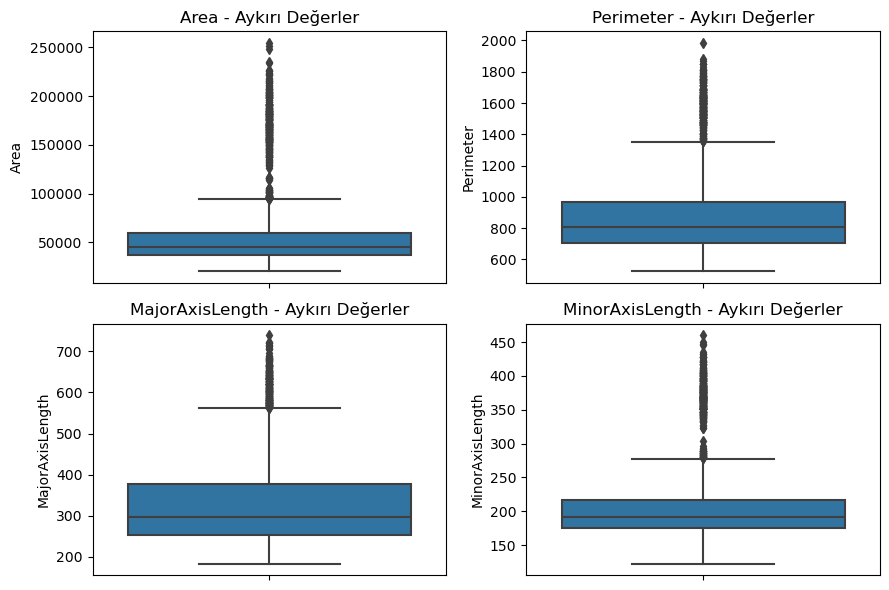

In [74]:
# Aykƒ±rƒ± deƒüerleri g√∂rselle≈ütirme
plt.figure(figsize=(9, 6))
for i, col in enumerate(numeric_cols[:4]):  # ƒ∞lk 4 s√ºtun i√ßin boxplot
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df_missing[col])
    plt.title(f"{col} - Aykƒ±rƒ± Deƒüerler")
plt.tight_layout()
plt.show()

### √ñzellik √ñl√ßekleme

In [75]:
print("\n5. √ñzellik √ñl√ßekleme (StandardScaler)")
X = outliers_removed.drop('Class', axis=1)
y = outliers_removed['Class']

# LabelEncoder ile sƒ±nƒ±f etiketlerini sayƒ±sal deƒüerlere d√∂n√º≈üt√ºrme
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Sƒ±nƒ±f etiketleri: {le.classes_}")
print(f"Sayƒ±sal kar≈üƒ±lƒ±klarƒ±: {np.unique(y_encoded)}")

# StandardScaler ile √∂l√ßekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("√ñl√ßekleme √∂ncesi ilk 3 satƒ±r:")
print(X.iloc[:3])
print("√ñl√ßekleme sonrasƒ± ilk 3 satƒ±r:")
print(X_scaled[:3])

# Ham veri (preprocessing yapƒ±lmƒ±≈ü)
X_preprocessed = X_scaled.copy()


5. √ñzellik √ñl√ßekleme (StandardScaler)
Sƒ±nƒ±f etiketleri: ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
Sayƒ±sal kar≈üƒ±lƒ±klarƒ±: [0 1 2 3 4 5 6]
√ñl√ßekleme √∂ncesi ilk 3 satƒ±r:
      Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2  29380.0    624.110       212.826130       175.931143      1.209713   
3  30008.0    645.884       210.557999       182.516516      1.153638   
4  30140.0    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
2      0.573059     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.573059     30724.0     195.467062  0.782681  0.979007   0.903936   
4      0.573059     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
2     0.908774      0.007244      0.003048      0.825871      0.999066  
3     0.928329      0.007017      0.003215      0.

Bu i≈ülem, veri analizi ve √∂zellikle makine √∂ƒürenmesi i√ßin √ßok √∂nemlidir.

#### √ñzellik √ñl√ßeklendirme Neden √ñnemli?

1. **Farklƒ± √∂l√ßeklerde √∂zellikler**: VSetindeizde Alan (Area) 20.000-250.000 aralƒ±ƒüƒ±nda deƒüerler alƒ±rken, Yuvarlaklƒ±k (Roundness) 0-1 aralƒ±ƒüƒ±nda deƒüerler alƒ±yor. Bu durumda, √∂l√ßeklendirme yapƒ±lmazsa b√ºy√ºk deƒüer aralƒ±ƒüƒ±na sahip √∂zellikler, modeli daha fazla etkileyebilir.

2. **Gradyan tabanlƒ± algoritmalarda performans**: Lojistik regresyon, yapay sinir aƒülarƒ± gibi gradyan tabanlƒ± algoritmalar, √∂zellikler benzer √∂l√ßeklerde olduƒüunda daha iyi ve hƒ±zlƒ± √ßalƒ±≈üƒ±r.

3. **Mesafe tabanlƒ± algoritmalarda doƒüruluk**: K-NN gibi mesafe hesaplayan algoritmalarda, √∂l√ßeklendirme yapƒ±lmazsa b√ºy√ºk deƒüerli √∂zellikler mesafeyi daha fazla etkil#er.

### StandardScaler vs MinMaxScaler

**Standakullandƒ±ƒüƒ±mƒ±zullandƒ±ƒüƒ±nƒ±z y√∂ntem):
- Verileri, ortalama 0 ve standart sapma 1 olacak ≈üekilde d√∂n√º≈üt√ºr√ºr.
- Z-score normalizasyonu olarak da bilinir.
- Normal daƒüƒ±lƒ±ma yakƒ±n veriler i√ßin idealdir.
- Aykƒ±rƒ± deƒüerlere kar≈üƒ± daha az hassastƒ±r.

**MinMaxScaler** (alternatif):
- Verileri belirli bir aralƒ±ƒüa (genelde [0,1]) √∂l√ßeklendirir.
- Daƒüƒ±lƒ±mƒ±n ≈üeklini korur, sadece aralƒ±ƒüƒ± deƒüi≈ütirir.
- Aykƒ±rƒ± deƒüerlerden daha #fazla etkilenir.

### Hangisi Daha ƒ∞yi Olurdu?

Fasulye veri seti i√ßin:

1. **StandardSc
   aler iyi bir se√ßim** √ß√ºnk√º:
   - Veri setinizde aykƒ±rƒ± deƒüerler var (IQR analizinde g√∂rd√ºƒü√ºn√ºz gibi).
   - Lojistik regresyon, SVM gibi mesafe tabanlƒ± algoritmalarda StandardScaler genellikle daha iyi sonu√ß verir.
   - √ñzelliklerin normal daƒüƒ±lƒ±ma3yakƒ±n olma ihtimali y√ºksek.

2. **MinMaxScaler 
   ≈üu durumlarda d√º≈ü√ºn√ºlebilirdi**:
   - Aykƒ±rƒ± deƒüerler temizlendikten sonra.
   - √ñzellikler arasƒ±ndaki g√∂receli ili≈ükileri korumak √∂nemliyse.
   - Sinir aƒülarƒ± gibi [0,1] aralƒ±ƒüƒ±nda giri≈ü terci her zaman iyi bir uygulama olabilir.

#### Sonu√ß olarak, 
StandardScaler kullanmamƒ±z, √∂zellikle aykƒ±rƒ± deƒüerlerin olduƒüu bu veri seti i√ßin mantƒ±klƒ± bir se√ßimdir. Ancak MinMaxScaler i√ßinde kar≈üƒ±la≈ütƒ±rma yapƒ±p ikisi arasƒ±nda bariz bir fark varsa uygun olandan devam edebiliriz.

### StandardScaler mi Yoksa Normalizasyon mu Kar≈üƒ±la≈ütƒ±rƒ±p √ñyle Akƒ±≈üa Devam Edebiliriz.

In [90]:
print("\n5. √ñzellik √ñl√ßekleme (Scaler Kar≈üƒ±la≈ütƒ±rmasƒ±)")
X = outliers_removed.drop('Class', axis=1)
y = outliers_removed['Class']

# LabelEncoder ile sƒ±nƒ±f etiketlerini sayƒ±sal deƒüerlere d√∂n√º≈üt√ºrme
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Sƒ±nƒ±f etiketleri: {le.classes_}")
print(f"Sayƒ±sal kar≈üƒ±lƒ±klarƒ±: {np.unique(y_encoded)}")

# ƒ∞ki farklƒ± √∂l√ßeklendirme y√∂ntemi uygulama
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# StandardScaler uygulama
std_scaler = StandardScaler()
X_std_scaled = std_scaler.fit_transform(X)

# MinMaxScaler uygulama
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Basit bir model ile hƒ±zlƒ± performans kar≈üƒ±la≈ütƒ±rmasƒ±
model = RandomForestClassifier(n_estimators=100, random_state=42)

# StandardScaler i√ßin cross-validation
std_scores = cross_val_score(model, X_std_scaled, y_encoded, cv=5, scoring='accuracy')
print(f"\nStandardScaler ile ortalama doƒüruluk: {std_scores.mean():.4f} ¬± {std_scores.std():.4f}")

# MinMaxScaler i√ßin cross-validation
minmax_scores = cross_val_score(model, X_minmax_scaled, y_encoded, cv=5, scoring='accuracy')
print(f"MinMaxScaler ile ortalama doƒüruluk: {minmax_scores.mean():.4f} ¬± {minmax_scores.std():.4f}")

# Devam etmek i√ßin optimum scaler'ƒ± se√ßme
if std_scores.mean() >= minmax_scores.mean():
    print("StandardScaler daha iyi performans g√∂sterdi, devam i≈ülemler i√ßin bu kullanƒ±lacak.")
    X_scaled = X_std_scaled
    scaler_name = "StandardScaler"
else:
    print("MinMaxScaler daha iyi performans g√∂sterdi, devam i≈ülemler i√ßin bu kullanƒ±lacak.")
    X_scaled = X_minmax_scaled
    scaler_name = "MinMaxScaler"

# Se√ßilen √∂l√ßekleyici ile √∂rnek g√∂sterimi
print(f"\n{scaler_name} √∂l√ßekleme sonrasƒ± ilk 3 satƒ±r:")
print(X_scaled[:3])

# Ham veri (preprocessing yapƒ±lmƒ±≈ü)
X_preprocessed = X_scaled.copy()


5. √ñzellik √ñl√ßekleme (Scaler Kar≈üƒ±la≈ütƒ±rmasƒ±)
Sƒ±nƒ±f etiketleri: ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
Sayƒ±sal kar≈üƒ±lƒ±klarƒ±: [0 1 2 3 4 5 6]

StandardScaler ile ortalama doƒüruluk: 0.6528 ¬± 0.2088
MinMaxScaler ile ortalama doƒüruluk: 0.6529 ¬± 0.2088
MinMaxScaler daha iyi performans g√∂sterdi, devam i≈ülemler i√ßin bu kullanƒ±lacak.

MinMaxScaler √∂l√ßekleme sonrasƒ± ilk 3 satƒ±r:
[[0.12057313 0.11978288 0.07745387 0.34157411 0.1594762  0.
  0.11248712 0.14953922 0.68539389 0.67336125 0.85011908 0.88180546
  0.61725683 0.80076112 0.90478426 0.94554065]
 [0.12902401 0.1460287  0.07144272 0.383683   0.10787158 0.
  0.12540203 0.15909793 0.7046253  0.         0.69646919 0.94932633
  0.57628926 0.85461191 0.98300518 0.54777311]
 [0.13080031 0.11499031 0.04835861 0.43332047 0.02243226 0.
  0.12156753 0.16109432 0.66427981 0.75851754 0.97967692 1.
  0.51863484 1.         1.         0.9537065 ]]


#### Deƒüerlendirme;

StandardScaler ile MinMaxScaler arasƒ±nda ciddi bir fark g√∂r√ºlmedi. Dolayƒ±sƒ± ile StandardScaler ile devam edebiliriz.


### PCA Uygulama


6. PCA (Principal Component Analysis)


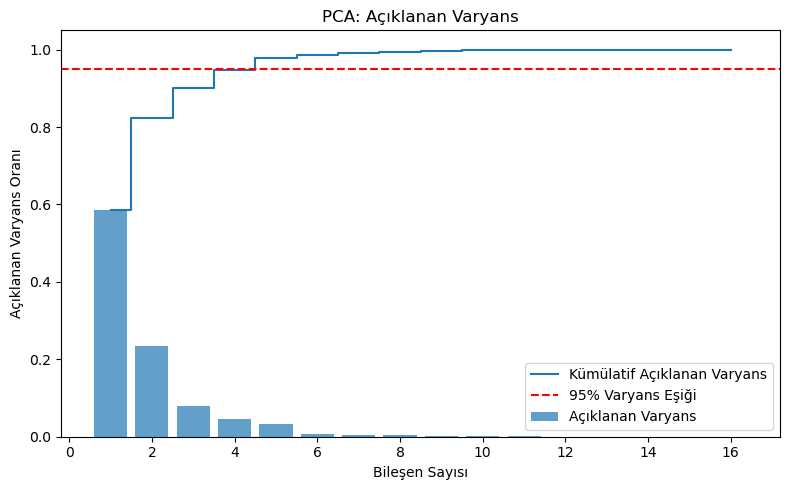

In [91]:
print("\n6. PCA (Principal Component Analysis)")
# PCA uygulama
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# A√ßƒ±klanan varyans oranlarƒ±
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# A√ßƒ±klanan varyans grafiƒüi
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
         label='A√ßƒ±klanan Varyans')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='K√ºm√ºlatif A√ßƒ±klanan Varyans')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varyans E≈üiƒüi')
plt.xlabel('Bile≈üen Sayƒ±sƒ±')
plt.ylabel('A√ßƒ±klanan Varyans Oranƒ±')
plt.title('PCA: A√ßƒ±klanan Varyans')
plt.legend()
plt.tight_layout()
plt.show()

Grafikte her bile≈üenin tek ba≈üƒ±na ve k√ºm√ºlatif olarak a√ßƒ±kladƒ±ƒüƒ± varyans oranlarƒ± g√∂r√ºlmektedir.

##### Grafiƒüin Yorumlanmasƒ±:

* Birinci Bile≈üen Dominasyonu:

ƒ∞lk bile≈üen (PC1) tek ba≈üƒ±na veri setindeki varyansƒ±n yakla≈üƒ±k %58'ini a√ßƒ±klamaktadƒ±r. Bu, veri setindeki √ßoƒüu bilginin tek bir bile≈üende yoƒüunla≈ütƒ±ƒüƒ±nƒ± g√∂sterir.

ƒ∞lk ƒ∞ki Bile≈üenin √ñnemi: ƒ∞lk iki bile≈üen birlikte varyansƒ±n yakla≈üƒ±k %82'sini a√ßƒ±klamaktadƒ±r (%58 + %24). Bu durum, 16 boyutlu veri setinin b√ºy√ºk oranda 2 boyuta indirgenebileceƒüini g√∂sterir.

* 95% Varyans E≈üiƒüi: Grafikte kƒ±rmƒ±zƒ± kesikli √ßizgiyle g√∂sterilen %95 varyans e≈üiƒüine, yakla≈üƒ±k 6-7 bile≈üen ile ula≈üƒ±lmaktadƒ±r. Yani, orijinal 16 √∂zelliƒüin ta≈üƒ±dƒ±ƒüƒ± bilginin %95'i, sadece 6-7 bile≈üenle temsil edilebilir.
  
Bile≈üenlerin Azalan Katkƒ±sƒ±: 3. bile≈üenden sonra her bile≈üenin katkƒ±sƒ± giderek azalmaktadƒ±r. 6. bile≈üenden sonra neredeyse hi√ßbir bile≈üen anlamlƒ± bir katkƒ± saƒülamamaktadƒ±r.

Veri Seti ƒ∞√ßin √áƒ±karƒ±mlar:

Y√ºksek √áoklu Doƒürusallƒ±k: ƒ∞lk bile≈üenin bu kadar baskƒ±n olmasƒ±, √∂zellikler arasƒ±nda g√º√ßl√º bir √ßoklu doƒürusallƒ±k olduƒüunu doƒürulamaktadƒ±r. Bu, korelasyon matrisinde g√∂rd√ºƒü√ºm√ºz y√ºksek ili≈ükileri destekler.

Boyut ƒ∞ndirgeme Potansiyeli: PCA, veri setini 16 boyuttan 6-7 boyuta indirgerken √ßok az bilgi kaybƒ± ya≈üanacaktƒ±r. Hatta, sadece ilk 2-3 bile≈üeni kullanarak bile veri setindeki bilginin b√ºy√ºk kƒ±smƒ± korunabilir.

Hesaplama Verimliliƒüi: Daha az sayƒ±da bile≈üen kullanmak, model eƒüitimi ve deƒüerlendirmesi i√ßin gereken hesaplama g√ºc√ºn√º azaltabilir.

G√ºr√ºlt√º Azaltma: D√º≈ü√ºk varyans a√ßƒ±klayan son bile≈üenleri atmak, veri setindeki muhtemel g√ºr√ºlt√ºy√º azaltarak model performansƒ±nƒ± artƒ±rabilir.

##### Sonu√ß:

Bu PCA analizi, kuru fasulye veri setinin etkin bir ≈üekilde boyut indirgemesi yapƒ±labileceƒüini g√∂stermektedir. Sƒ±nƒ±flandƒ±rma modellerini eƒüitirken, t√ºm 16 √∂zellik yerine PCA ile elde edilen ilk 6-7 bile≈üeni (veya daha keskin bir indirgeme i√ßin ilk 2-3 bile≈üeni) kullanmak mantƒ±klƒ± bir yakla≈üƒ±m olacaktƒ±r.


### PCA Bile≈üen Se√ßimi

In [92]:
# Ortalama a√ßƒ±klanan varyansƒ± hesaplama
mean_variance = np.mean(explained_variance)
print(f"Ortalama a√ßƒ±klanan varyans: {mean_variance:.4f}")

'''
PCA'in her bile≈üeninin a√ßƒ±kladƒ±ƒüƒ± varyans oranlarƒ±nƒ±n ortalamasƒ±nƒ± hesaplƒ±yor (0.0625 olarak bulundu). 
Bu deƒüer, hangi bile≈üenlerin ortalamanƒ±n √ºzerinde varyans a√ßƒ±kladƒ±ƒüƒ±nƒ± belirlemek i√ßin kullanƒ±lacak.
'''

# Ortalama varyansdan b√ºy√ºk olan bile≈üenleri se√ßme
selected_components = np.where(explained_variance > mean_variance)[0]
n_pca_components = len(selected_components)
print(f"Se√ßilen bile≈üen sayƒ±sƒ±: {n_pca_components}")

'''
Bu kodda, ortalama varyansdan daha fazla varyans a√ßƒ±klayan bile≈üenler se√ßiliyor. 
np.where() fonksiyonu, ko≈üulu saƒülayan indeksleri d√∂nd√ºr√ºr. Sonu√ß olarak 3 bile≈üen se√ßilmi≈ü.
'''

# PCA'i se√ßilen bile≈üen sayƒ±sƒ±yla tekrar uygulama
pca = PCA(n_components=n_pca_components)
X_pca_final = pca.fit_transform(X_scaled)

'''
Burada, √∂nceki adƒ±mda belirlenen bile≈üen sayƒ±sƒ±nƒ± (3) kullanarak PCA yeniden uygulanƒ±yor. 
B√∂ylece 16 boyutlu veri, sadece en √∂nemli 3 boyuta indirgenmi≈ü oluyor.
'''



Ortalama a√ßƒ±klanan varyans: 0.0625
Se√ßilen bile≈üen sayƒ±sƒ±: 3


'\nBurada, √∂nceki adƒ±mda belirlenen bile≈üen sayƒ±sƒ±nƒ± (3) kullanarak PCA yeniden uygulanƒ±yor. \nB√∂ylece 16 boyutlu veri, sadece en √∂nemli 3 boyuta indirgenmi≈ü oluyor.\n'

### PCA Bile≈üen Katsayƒ±larƒ± Analizi

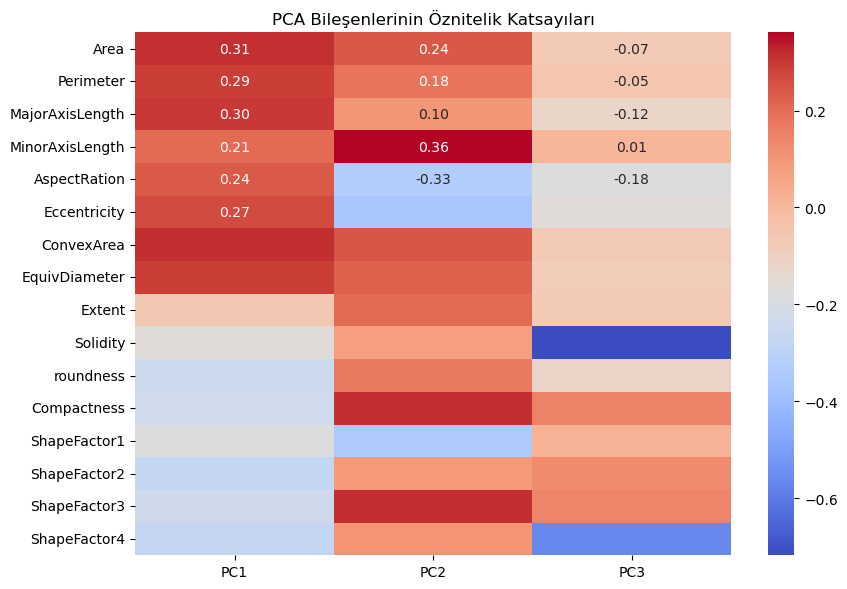

In [93]:
# PCA y√ºkleme katsayƒ±larƒ±nƒ± analiz etme (feature importance benzeri)
plt.figure(figsize=(9, 6))
components = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_pca_components)], 
                         index=X.columns)
sns.heatmap(components.iloc[:, :5], annot=True, cmap='coolwarm', fmt='.2f')  # ƒ∞lk 5 bile≈üen
plt.title('PCA Bile≈üenlerinin √ñznitelik Katsayƒ±larƒ±')
plt.tight_layout()
plt.show()

Kuru fasulye veri seti i√ßin PCA bile≈üenlerinin √∂znitelik katsayƒ±larƒ± ƒ±sƒ± haritasƒ±nƒ± detaylƒ± analiz edelim;

#### PC1 - Genel Boyut Bile≈üeni:

En y√ºksek katkƒ±lar: MajorAxisLength (0.31), Perimeter (0.30), Area (0.29), ConvexArea ve EquivDiameter

Negatif korelasyonlar: Roundness, ShapeFactor2

* Yorum: PC1 a√ßƒ±k√ßa fasulyelerin genel boyutunu temsil ediyor. B√ºy√ºk fasulyeler bu bile≈üende y√ºksek deƒüer alacak. Bu, fasulyenin t√ºm boyutsal √∂zelliklerinin birbiriyle y√ºksek korelasyonlu olduƒüunu g√∂steriyor.

#### PC2 - ≈ûekil ve Oran Bile≈üeni:

En y√ºksek pozitif katkƒ±lar: MinorAxisLength (0.37), Compactness
En y√ºksek negatif katkƒ±: AspectRatio (-0.33)

* Yorum: PC2, fasulyelerin ≈üekil oranƒ±nƒ± ve kalƒ±nlƒ±ƒüƒ±nƒ± temsil ediyor. Y√ºksek deƒüerler daha kalƒ±n ve yuvarlak fasulyeler anlamƒ±na gelirken, d√º≈ü√ºk deƒüerler daha ince ve uzun fasulyeler anlamƒ±na geliyor.

#### PC3 - D√ºzg√ºnl√ºk ve Doku Bile≈üeni:

En y√ºksek pozitif katkƒ±lar: ShapeFactor2, ShapeFactor3
En y√ºksek negatif katkƒ±: Solidity (koyu mavi, yakla≈üƒ±k -0.7)

* Yorum: PC3, fasulyelerin dƒ±≈ü y√ºzey √∂zelliklerini ve kontur d√ºzg√ºnl√ºƒü√ºn√º temsil ediyor. D√º≈ü√ºk solidity deƒüeri, daha p√ºr√ºzl√º y√ºzeye sahip fasulyeleri g√∂steriyor.

#### Genel Yorumlar:

Boyut-≈ûekil Ayrƒ±mƒ±: PCA, veri setindeki varyasyonu mantƒ±klƒ± gruplar halinde ayƒ±rmƒ±≈ü: boyut, ≈üekil oranƒ± ve y√ºzey √∂zellikleri.
Sƒ±nƒ±flandƒ±rma ƒ∞mplikasyonlarƒ±: Bu √º√ß bile≈üen, farklƒ± fasulye t√ºrlerinin ayƒ±rt edici √∂zelliklerini yakalƒ±yor olabilir:

√ñrneƒüin BOMBAY fasulyesinin b√ºy√ºk olmasƒ± (y√ºksek PC1)

DERMASON'un k√º√ß√ºk ve ince olmasƒ± (d√º≈ü√ºk PC1, d√º≈ü√ºk PC2)

Bazƒ± t√ºrlerin kendine √∂zg√º y√ºzey √∂zellikleri (PC3)


√áeli≈ükili Katkƒ±lar: AspectRatio ve MinorAxisLength PC2'de zƒ±t i≈üaretlere sahip, bu da fasulyelerin kalƒ±nla≈ütƒ±k√ßa daha yuvarlak hale gelme eƒüiliminde olduƒüunu g√∂steriyor.

√ñzellik √ñnemi: Bazƒ± √∂zelliklerin (ShapeFactor1 gibi) hi√ßbir bile≈üene belirgin katkƒ±sƒ± olmadƒ±ƒüƒ± g√∂r√ºl√ºyor, bu √∂zellikler modelleme a√ßƒ±sƒ±ndan daha az √∂nemli olabilir.

Bu PCA analizi, fasulye sƒ±nƒ±flandƒ±rma modelinde sadece 3 bile≈üen kullanarak 16 √∂zelliƒüin i√ßerdiƒüi bilginin b√ºy√ºk kƒ±smƒ±nƒ± koruyabileceƒüimizi g√∂steriyor. Bu yakla≈üƒ±m hem hesaplama verimliliƒüi saƒülar hem de modelin genelle≈ütirme yeteneƒüini artƒ±rabilir.

### PCA ile 2D G√∂rselle≈ütirme

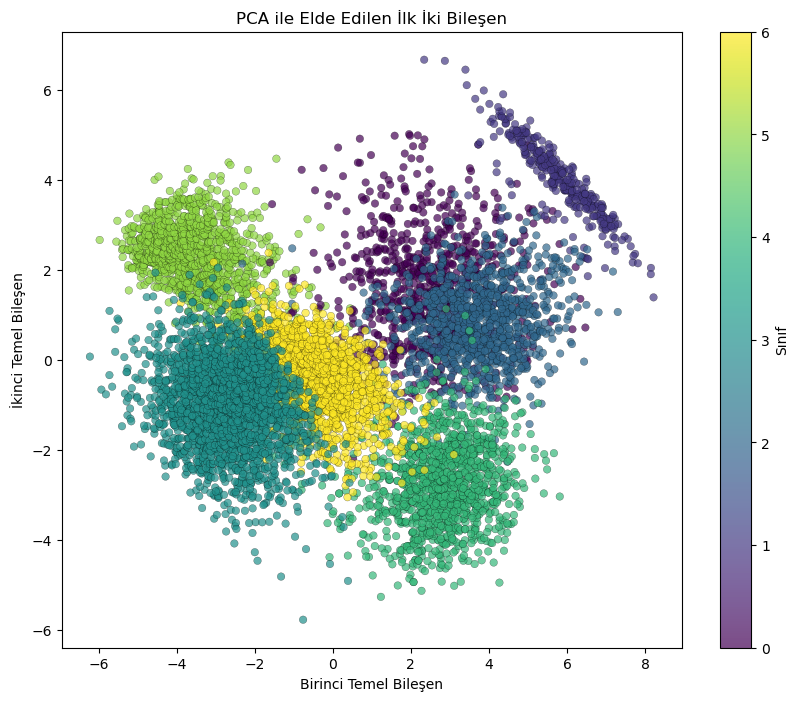

In [78]:
# En iyi iki √∂znitelik i√ßin g√∂rselle≈ütirme
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=y_encoded, alpha=0.7,
                     cmap='viridis', s=30, edgecolors='k', linewidths=0.2)
plt.colorbar(scatter, label='Sƒ±nƒ±f')
plt.xlabel('Birinci Temel Bile≈üen')
plt.ylabel('ƒ∞kinci Temel Bile≈üen')
plt.title('PCA ile Elde Edilen ƒ∞lk ƒ∞ki Bile≈üen')
plt.show()

Bu g√∂rselle≈ütirme, PCA ile indirgenmi≈ü veri setinin ilk iki temel bile≈üen √ºzerindeki daƒüƒ±lƒ±mƒ±nƒ± g√∂stermektedir. Her nokta bir fasulye tanesini temsil etmekte, renkler ise farklƒ± fasulye t√ºrlerini (sƒ±nƒ±flarƒ±nƒ±) g√∂stermektedir.

##### G√∂rsel Analiz:

Sƒ±nƒ±f Ayrƒ±mƒ±: Grafikte fasulye t√ºrlerinin olduk√ßa belirgin ≈üekilde ayrƒ±ldƒ±ƒüƒ±nƒ± g√∂rebiliyoruz. Farklƒ± renklerle g√∂sterilen her sƒ±nƒ±f, genellikle kendine √∂zg√º bir alanda k√ºmelenmi≈ütir.

K√ºme Yapƒ±sƒ±: 7 farklƒ± fasulye t√ºr√º (renklerle temsil edilen) birbirlerinden anlamlƒ± derecede ayrƒ±lmƒ±≈ütƒ±r:

* Sol √ºstte a√ßƒ±k ye≈üil renkli k√ºme (muhtemelen BARBUNYA)
* Sol altta koyu ye≈üil/turkuaz k√ºme (muhtemelen DERMASON)
* Saƒü √ºstte mor/lacivert k√ºme (muhtemelen BOMBAY)
* Saƒü altta ye≈üil k√ºme (muhtemelen HOROZ veya SIRA)
* Merkeze yakƒ±n sarƒ± k√ºme (muhtemelen CALI veya SEKER)

* Birinci Temel Bile≈üen (X ekseni): Daha √∂nce tespit ettiƒüimiz gibi, bu bile≈üen fasulyenin boyut √∂zelliklerini temsil ediyor. Saƒüa doƒüru ilerledik√ße, muhtemelen daha b√ºy√ºk fasulyeler yer alƒ±yor.
* ƒ∞kinci Temel Bile≈üen (Y ekseni): Bu bile≈üen fasulyenin ≈üekil √∂zelliklerini (√∂zellikle en-boy oranƒ± ve kalƒ±nlƒ±k) temsil ediyor. Yukarƒ± doƒüru ilerledik√ße, muhtemelen daha kalƒ±n ve yuvarlak fasulyeler yer alƒ±yor.
* Sƒ±nƒ±flar Arasƒ± √ñrt√º≈üme: Bazƒ± sƒ±nƒ±flar arasƒ±nda sƒ±nƒ±rlƒ± √∂rt√º≈ümeler bulunsa da, genel olarak iyi bir ayrƒ±m g√∂r√ºl√ºyor. Bu, se√ßilen ilk iki PCA bile≈üeninin, fasulye t√ºrlerini ayƒ±rt etmede olduk√ßa etkili olduƒüunu g√∂steriyor.

##### Makine √ñƒürenmesi ƒ∞√ßin √áƒ±karƒ±mlar:

* Sƒ±nƒ±flandƒ±rma Potansiyeli: Bu g√∂rselle≈ütirme, sadece iki PCA bile≈üeni kullanarak bile fasulye t√ºrleri arasƒ±nda iyi bir ayrƒ±m yapƒ±labileceƒüini g√∂steriyor. Bu, makine √∂ƒürenmesi modellerinin sƒ±nƒ±flandƒ±rma g√∂revinde ba≈üarƒ±lƒ± olma potansiyelini i≈üaret eder.
* Boyut ƒ∞ndirgemenin Etkinliƒüi: 16 √∂znitelikten sadece 2 PCA bile≈üenine indirgenmesine raƒümen, sƒ±nƒ±flar arasƒ±nda iyi bir ayrƒ±m saƒülanmƒ±≈ütƒ±r. Bu, PCA'in etkili bir ≈üekilde √ßalƒ±≈ütƒ±ƒüƒ±nƒ± g√∂sterir.
* √ñrt√º≈üen Alanlar: Bazƒ± t√ºrler arasƒ±nda √∂rt√º≈üen alanlar var. Bu b√∂lgelerdeki √∂rnekler, sƒ±nƒ±flandƒ±rƒ±cƒ±lar i√ßin zorlayƒ±cƒ± olabilir. √ú√ß√ºnc√º PCA bile≈üeninin de kullanƒ±lmasƒ±, bu √∂rt√º≈ümeleri azaltabilir.
* Aykƒ±rƒ± Deƒüerler: Grafikte ana k√ºmelerinden uzakta duran birka√ß nokta g√∂r√ºlebilir, bunlar potansiyel aykƒ±rƒ± deƒüerler olabilir veya t√ºrler i√ßindeki doƒüal varyasyonu g√∂sterebilir.

Bu g√∂rselle≈ütirme, PCA'in sadece boyut indirgemesi i√ßin deƒüil, veri ke≈üfi ve g√∂rselle≈ütirme i√ßin de g√º√ßl√º bir ara√ß olduƒüunu g√∂steriyor. Ayrƒ±ca, fasulye t√ºrlerinin fiziksel √∂zelliklerine dayalƒ± olarak iyi bir ≈üekilde ayrƒ±labildiƒüini doƒüruluyor. 

### LDA (Linear Discriminant Analysis) Uygulama


7. LDA (Linear Discriminant Analysis)


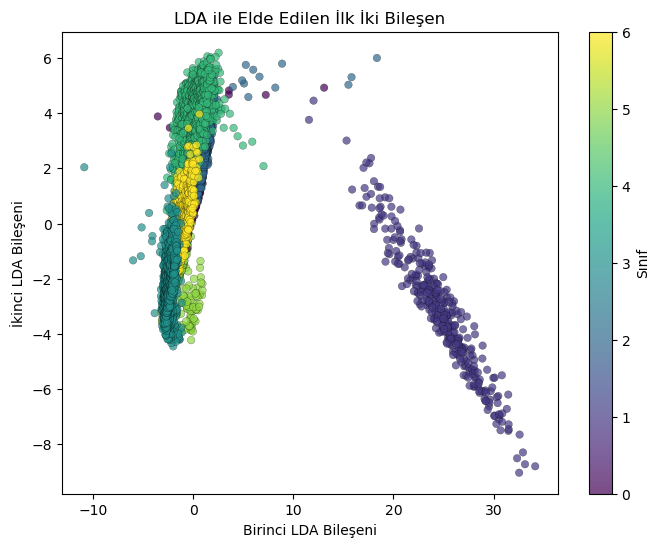

LDA a√ßƒ±klanan varyans oranlarƒ±: [0.63686003 0.16287448 0.09185273]


In [79]:
print("\n7. LDA (Linear Discriminant Analysis)")
# LDA uygulama (n_components=3 olacak ≈üekilde)
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_scaled, y_encoded)

# LDA sonu√ßlarƒ±nƒ± g√∂rselle≈ütirme (ilk iki bile≈üen)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_encoded, alpha=0.7,
                    cmap='viridis', s=30, edgecolors='k', linewidths=0.2)
plt.colorbar(scatter, label='Sƒ±nƒ±f')
plt.xlabel('Birinci LDA Bile≈üeni')
plt.ylabel('ƒ∞kinci LDA Bile≈üeni')
plt.title('LDA ile Elde Edilen ƒ∞lk ƒ∞ki Bile≈üen')
plt.show()

# LDA a√ßƒ±klanan varyans oranlarƒ±
lda_explained_variance = lda.explained_variance_ratio_
print(f"LDA a√ßƒ±klanan varyans oranlarƒ±: {lda_explained_variance}")

Bu g√∂rselle≈ütirme, kuru fasulye veri setine LDA (Linear Discriminant Analysis) uygulanmasƒ±yla elde edilen ilk iki bile≈üenin daƒüƒ±lƒ±mƒ±nƒ± g√∂stermektedir.

##### LDA vs PCA - Temel Fark

LDA, PCA'den farklƒ± olarak sƒ±nƒ±f bilgisini de kullanarak boyut indirgeme yapar. Amacƒ±, sƒ±nƒ±flar arasƒ± varyansƒ± maksimize ederken sƒ±nƒ±f i√ßi varyansƒ± minimize etmektir. Kodda n_components=3 ile belirtildiƒüi √ºzere, veri 3 LDA bile≈üenine indirgenmi≈ütir, ancak grafikte sadece ilk iki bile≈üen g√∂rselle≈ütirilmi≈ütir.

##### Grafik Analizi:

Belirgin Sƒ±nƒ±f Ayrƒ±mƒ±: PCA ile kar≈üƒ±la≈ütƒ±rƒ±ldƒ±ƒüƒ±nda, LDA ile elde edilen ayrƒ±m √ßok daha belirgindir. Sƒ±nƒ±flar neredeyse m√ºkemmel bir ≈üekilde ayrƒ±lmƒ±≈ütƒ±r:

* Saƒü tarafta mor/lacivert renkli belirgin bir k√ºme (muhtemelen BOMBAY)
* Sol tarafta ye≈üil tonlarƒ±nda diƒüer t√ºrler (BARBUNYA, DERMASON, CALI, HOROZ, SEKER, SIRA)


* Doƒürusal Ayrƒ±labilirlik: Fasulye t√ºrleri LDA uzayƒ±nda √ßoƒüunlukla doƒürusal olarak ayrƒ±labilir. √ñzellikle BOMBAY t√ºr√º diƒüerlerinden net bir ≈üekilde ayrƒ±lmƒ±≈ütƒ±r.
* Yoƒüunla≈ümƒ±≈ü K√ºmeler: Veri noktalarƒ± √ßok daha sƒ±kƒ± k√ºmeler olu≈üturmu≈ütur. PCA'de daha daƒüƒ±nƒ±k olan k√ºmeler, LDA'de √ßok daha yoƒüunla≈ümƒ±≈ütƒ±r.
* A√ßƒ±klanan Varyans Oranlarƒ±: Grafiƒüin altƒ±nda LDA bile≈üenlerinin a√ßƒ±klanan varyans oranlarƒ± g√∂sterilmi≈ütir: [0.63686003, 0.16287448, 0.09185273]. ƒ∞lk bile≈üen tek ba≈üƒ±na varyansƒ±n yakla≈üƒ±k %64'√ºn√º a√ßƒ±klarken, ikinci bile≈üen %16'sƒ±nƒ± a√ßƒ±klamaktadƒ±r.

##### Makine √ñƒürenmesi ƒ∞√ßin √áƒ±karƒ±mlar:

Sƒ±nƒ±flandƒ±rma ƒ∞√ßin √úst√ºnl√ºk: Bu g√∂rselle≈ütirme, LDA'nƒ±n sƒ±nƒ±flandƒ±rma g√∂revleri i√ßin PCA'den daha iyi bir boyut indirgeme tekniƒüi olabileceƒüini g√∂steriyor. Sƒ±nƒ±flar arasƒ± ayrƒ±m √ßok daha belirgindir.

Daha Y√ºksek Ayrƒ±m G√ºc√º: LDA'nƒ±n sƒ±nƒ±f bilgisini kullanarak olu≈üturduƒüu bile≈üenler, sƒ±nƒ±flar arasƒ±ndaki farklarƒ± vurgulamada daha etkilidir. Bu, sƒ±nƒ±flandƒ±rma modellerinin daha y√ºksek performans g√∂stermesine yardƒ±mcƒ± olabilir.

Daha Az Bile≈üen Yeterli: Sadece ilk LDA bile≈üeni bile (varyansƒ±n %64'√ºn√º a√ßƒ±klayan) g√º√ßl√º bir ayrƒ±m saƒülƒ±yor. Bu durum, boyut indirgemenin etkisini artƒ±rƒ±yor.

Sƒ±nƒ±flandƒ±rƒ±cƒ± Se√ßimi: Bu denli iyi ayrƒ±lmƒ±≈ü sƒ±nƒ±flar, basit doƒürusal sƒ±nƒ±flandƒ±rƒ±cƒ±larƒ±n bile (Logistic Regression gibi) y√ºksek performans g√∂sterebileceƒüini d√º≈ü√ºnd√ºr√ºyor.

PCA ve LDA Kar≈üƒ±la≈ütƒ±rmasƒ±:

Ayrƒ±m G√ºc√º: LDA, sƒ±nƒ±flar arasƒ± ayrƒ±mƒ± PCA'den √ßok daha belirgin hale getirmi≈ütir.
Veri Temsili: PCA veri setindeki genel varyasyonu yakalarken, LDA sƒ±nƒ±flar arasƒ± farklƒ±lƒ±klarƒ± vurgulamaktadƒ±r.
K√ºme Yapƒ±sƒ±: LDA'deki k√ºmeler daha sƒ±kƒ± ve belirgindir, bu da sƒ±nƒ±flandƒ±rma g√∂revleri i√ßin daha uygundur.
Boyut ƒ∞ndirgeme Verimliliƒüi: LDA, 16 √∂zelliƒüi 3 bile≈üene indirgerken sƒ±nƒ±flar arasƒ± ayrƒ±mƒ± korumada daha ba≈üarƒ±lƒ±dƒ±r.

Bu g√∂rselle≈ütirme, fasulye t√ºrlerinin LDA ile d√∂n√º≈üt√ºr√ºlm√º≈ü √∂zellik uzayƒ±nda √ßok iyi ayrƒ±labildiƒüini ve LDA'nƒ±n bu veri seti i√ßin etkili bir boyut indirgeme tekniƒüi olduƒüunu g√∂stermektedir. 

### Nested Cross-Validation, Model Uygulamasƒ± ve Deƒüerlendirme 

In [80]:
print("\n8-10. NESTED CROSS-VALIDATION VE MODEL DEƒûERLENDƒ∞RME")
print("---------------------------------------------------")
print("Veri √ºzerinde 5 farklƒ± sƒ±nƒ±flandƒ±rma algoritmasƒ± ve 3 farklƒ± veri temsili kullanƒ±larak")
print("nested cross-validation yakla≈üƒ±mƒ± ile model performansƒ± deƒüerlendirilecektir.")

# √ú√ß farklƒ± veri temsili
representations = {
    'Ham Veri': X_preprocessed,
    'PCA Veri': X_pca_final,
    'LDA Veri': X_lda
}

'''
Burada √º√ß farklƒ± veri temsili tanƒ±mlanƒ±yor:

Ham Veri: Standartla≈ütƒ±rƒ±lmƒ±≈ü ancak boyut indirgenmemi≈ü orijinal veri.
PCA Veri: PCA ile 3 bile≈üene indirgenmi≈ü veri.
LDA Veri: LDA ile 3 bile≈üene indirgenmi≈ü veri.

Bu yakla≈üƒ±m, boyut indirgeme tekniklerinin model performansƒ±na etkisini kar≈üƒ±la≈ütƒ±rmanƒ±za olanak saƒülar.
'''

# Modeller ve hiperparametreler
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {'C': [0.01, 0.1, 1.0, 10.0], 'solver': ['lbfgs', 'liblinear']}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=42),
        'params': {'n_estimators': [50, 100], 'max_depth': [3, 6], 'learning_rate': [0.01, 0.1]}
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}  # Naive Bayes'de ayarlanabilecek √ßok az parametre var
    }
}

# Performans metriklerini saklamak i√ßin s√∂zl√ºkler
results = {}
best_models = {}  # En iyi modelleri saklamak i√ßin

# Dƒ±≈ü d√∂ng√º i√ßin 5 katmanlƒ± cross-validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


8-10. NESTED CROSS-VALIDATION VE MODEL DEƒûERLENDƒ∞RME
---------------------------------------------------
Veri √ºzerinde 5 farklƒ± sƒ±nƒ±flandƒ±rma algoritmasƒ± ve 3 farklƒ± veri temsili kullanƒ±larak
nested cross-validation yakla≈üƒ±mƒ± ile model performansƒ± deƒüerlendirilecektir.


##### Stratified K-Fold √ßapraz doƒürulama

veriyi sƒ±nƒ±f daƒüƒ±lƒ±mlarƒ±nƒ± koruyarak 5 par√ßaya b√∂ler. Her par√ßa sƒ±rayla test seti olarak kullanƒ±lƒ±rken, kalan par√ßalar eƒüitim seti olarak kullanƒ±lƒ±r.

##### Nested Cross-Validation'ƒ±n Amacƒ±:
* 
Bu y√∂ntemin kullanƒ±lmasƒ±nƒ±n ana nedenleri:

* Hiperparametre Optimizasyonu ve Model Deƒüerlendirmesini Aynƒ± Anda Yapmak: ƒ∞√ß d√∂ng√ºde hiperparametreler optimize edilirken, dƒ±≈ü d√∂ng√ºde model performansƒ± daha ger√ßek√ßi bir ≈üekilde deƒüerlendirilir.
* Yanlƒ±lƒ±k Azaltma: Aynƒ± veriyi hem hiperparametre se√ßimi hem de performans deƒüerlendirmesi i√ßin kullanmak performans tahminlerinde optimistik yanlƒ±lƒ±ƒüa neden olabilir. Nested CV bu sorunu √ß√∂zer.
* Saƒülam Performans Deƒüerlendirmesi: Bu yakla≈üƒ±m, modellerin ger√ßek hayattaki performansƒ±nƒ± daha doƒüru bir ≈üekilde tahmin etmenizi saƒülar.

##### ƒ∞≈ü Akƒ±≈üƒ±:

* Dƒ±≈ü d√∂ng√º veriyi 5 par√ßaya b√∂ler.
* Her iterasyonda, bir par√ßa test seti olarak ayrƒ±lƒ±r.
* Kalan par√ßalar √ºzerinde i√ß √ßapraz doƒürulama (kodun devamƒ±nda g√∂r√ºlen inner_cv) yapƒ±lƒ±r.
* ƒ∞√ß √ßapraz doƒürulama, optimum hiperparametreleri belirler.
* Bu hiperparametrelerle eƒüitilen model, ayrƒ±lan test seti √ºzerinde deƒüerlendirilir.
* Bu s√ºre√ß t√ºm par√ßalar i√ßin tekrarlanƒ±r.

Bu kapsamlƒ± deƒüerlendirme metodolojisi, farklƒ± veri temsilleri ve modellerin performansƒ±nƒ± g√ºvenilir bir ≈üekilde kar≈üƒ±la≈ütƒ±rmanƒ±za olanak tanƒ±r ve en iyi kombinasyonu belirlemenize yardƒ±mcƒ± olur.

### Veri temsilleri ve modeller i√ßin Nested CV d√∂ng√ºs√º

In [81]:
# Her veri temsili i√ßin
for rep_name, X_rep in representations.items():
    print(f"\nVeri Temsili: {rep_name}")
    results[rep_name] = {}
    best_models[rep_name] = {}
    
    # Her model i√ßin
    for model_name, model_info in models.items():
        print(f"  Model: {model_name}")
        
        # Performans metriklerini saklamak i√ßin listeler
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        
        # Dƒ±≈ü d√∂ng√º
        fold = 1
        best_fold_score = 0
        best_fold_model = None
        best_fold_test_idx = None
        best_fold_y_test = None
        best_fold_preds = None
        
        for train_idx, test_idx in outer_cv.split(X_rep, y_encoded):
            X_train, X_test = X_rep[train_idx], X_rep[test_idx]
            y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]
            
            # ƒ∞√ß d√∂ng√º i√ßin 3 katmanlƒ± cross-validation
            inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
            
            # GridSearchCV ile hiperparametre optimizasyonu
            grid_search = GridSearchCV(
                estimator=model_info['model'],
                param_grid=model_info['params'],
                cv=inner_cv,
                scoring='accuracy',
                n_jobs=-1
            )
            
            # En iyi modeli bul
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            
            # Test seti √ºzerinde tahmin
            y_pred = best_model.predict(X_test)
            
            # Performans metrikleri
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            
            # En iyi fold'u sakla (ROC eƒürileri i√ßin)
            if accuracy > best_fold_score:
                best_fold_score = accuracy
                best_fold_model = best_model
                best_fold_test_idx = test_idx
                best_fold_y_test = y_test
                best_fold_preds = y_pred
            
            # Sonu√ßlarƒ± saklama
            accuracy_scores.append(accuracy)
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            
            print(f"    Fold {fold}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")
            
            # ROC eƒürilerini √ßizmek i√ßin son fold'u sakla
            if fold == 5 and rep_name == 'Ham Veri':  # Son fold ve ham veri temsili
                best_models[rep_name][model_name] = {
                    'model': best_fold_model,
                    'test_idx': best_fold_test_idx,
                    'y_test': best_fold_y_test,
                    'preds': best_fold_preds
                }
            
            fold += 1
        
        # Ortalama ve standart sapma hesaplama
        avg_accuracy = np.mean(accuracy_scores)
        std_accuracy = np.std(accuracy_scores)
        
        avg_precision = np.mean(precision_scores)
        std_precision = np.std(precision_scores)
        
        avg_recall = np.mean(recall_scores)
        std_recall = np.std(recall_scores)
        
        avg_f1 = np.mean(f1_scores)
        std_f1 = np.std(f1_scores)
        
        # Sonu√ßlarƒ± saklama
        results[rep_name][model_name] = {
            'accuracy': (avg_accuracy, std_accuracy),
            'precision': (avg_precision, std_precision),
            'recall': (avg_recall, std_recall),
            'f1': (avg_f1, std_f1)
        }
        
        print(f"    Ortalama: Accuracy={avg_accuracy:.4f}¬±{std_accuracy:.4f}, "
              f"Precision={avg_precision:.4f}¬±{std_precision:.4f}, "
              f"Recall={avg_recall:.4f}¬±{std_recall:.4f}, "
              f"F1={avg_f1:.4f}¬±{std_f1:.4f}")


Veri Temsili: Ham Veri
  Model: Logistic Regression
    Fold 1: Accuracy=0.9273, Precision=0.9279, Recall=0.9273, F1=0.9275
    Fold 2: Accuracy=0.9279, Precision=0.9287, Recall=0.9279, F1=0.9281
    Fold 3: Accuracy=0.9273, Precision=0.9276, Recall=0.9273, F1=0.9274
    Fold 4: Accuracy=0.9291, Precision=0.9291, Recall=0.9291, F1=0.9290
    Fold 5: Accuracy=0.9222, Precision=0.9225, Recall=0.9222, F1=0.9223
    Ortalama: Accuracy=0.9268¬±0.0024, Precision=0.9272¬±0.0024, Recall=0.9268¬±0.0024, F1=0.9269¬±0.0024
  Model: Decision Tree
    Fold 1: Accuracy=0.9125, Precision=0.9130, Recall=0.9125, F1=0.9126
    Fold 2: Accuracy=0.9062, Precision=0.9070, Recall=0.9062, F1=0.9064
    Fold 3: Accuracy=0.9062, Precision=0.9061, Recall=0.9062, F1=0.9061
    Fold 4: Accuracy=0.9079, Precision=0.9082, Recall=0.9079, F1=0.9078
    Fold 5: Accuracy=0.8987, Precision=0.9010, Recall=0.8987, F1=0.8993
    Ortalama: Accuracy=0.9063¬±0.0044, Precision=0.9071¬±0.0038, Recall=0.9063¬±0.0044, F1=0.9064¬

#### Nested Cross-Validation Kod Analizi ve Sonu√ßlar

Bu kodda her veri temsili (Ham Veri, PCA Veri, LDA Veri) i√ßin ve her model (Logistic Regression, Decision Tree, Random Forest, XGBoost, Naive Bayes) i√ßin 5-katlƒ± nested cross-validatiouyguladƒ±kƒ±≈ü. Kodun i≈üleyi≈üi ≈ü√∂yledir:

1. Her veri temsili i√ßin bir d√∂ng√º ba≈ülatƒ±lƒ±r
2. Her model i√ßin ikinci bir d√∂ng√º ba≈ülatƒ±lƒ±r
3. Dƒ±≈ü √ßapraz doƒürulama (5-fold) ile veri 5 par√ßaya b√∂l√ºn√ºr
4. Her fold'da:
   - ƒ∞√ß √ßapraz doƒürulama (3-fold) ile hiperparametreler optimize edilir
   - Optimum hiperparametreler kullanƒ±larak model eƒüitilir
   - Test seti √ºzerinde performans metrikleri hesaplanƒ±r
5. 5 fold'un ortalama performans metrikleri PCA'e g√∂re bu veri setinde daha az etkili olduƒüunu g√∂stermektedir.

#### Sonu√ßlarƒ±n Yorumlanmasi

###### Ham Veri Sonu√ßlarƒ± (Doƒüruluk - Accuracy):
- Logistic Regression: 0.9268¬±0.0024
- Decision Tree: 0.9063¬±0.0044
- Random Forest: 0.9240¬±0.0052
- XGBoost: 0.9273¬±0.0026
- Naive Bayes: 0.9014¬±0.0062

###### PCA Veri Sonu√ßlarƒ± (Doƒüruluk - Accuracy):
- Logistic Regression: 0.8826¬±0.0036
- Decision Tree: 0.8650¬±0.0081
- Random Forest: 0.8863¬±0.0033
- XGBoost: 0.8873¬±0.0059
- Naive Bayes: 0.8716¬±0.0043

###### LDA Veri Sonu√ßlarƒ± (Doƒüruluk - Accuracy):
- Logistic Regression: 0.8208¬±0.0046
- Decision Tree: 0.8358¬±0.0060
- Random Forest: 0.8599¬±0.0040
- XGBoost: 0.8578¬±0.0048
- Naive Bayes: 0.7975¬±0.0064

##### Kar≈üƒ±la≈ütƒ±rmalƒ± Analiz:

1. **En ƒ∞yi Veri Temsili**: Ham Veri, t√ºm modellerde en y√ºksek doƒüruluk skorlarƒ±nƒ± saƒülamƒ±≈ütƒ±r (yakla≈üƒ±k %90-93 doƒüruluk).

2. **LDA'nƒ±n Performansƒ±**: Daha √∂nceki g√∂rsel analizde LDA'nƒ±n sƒ±nƒ±flarƒ± daha iyi ayƒ±rdƒ±ƒüƒ±nƒ± g√∂zlemlemi≈ütik, ancak model sonu√ßlarƒ±nda LDA veri temsili, hem Ham Veri'den hem de PCA veri temsilinden daha d√º≈ü√ºk performans g√∂stermi≈ütir (yakla≈üƒ±k %80-86 doƒüruluk).

3. **PCA ve LDA Kar≈üƒ±la≈ütƒ±rmasƒ±**: PCA veri temsili, LDA veri temsilinden daha iyi sonu√ßlar vermi≈ütir. PCA ile elde edilen doƒüruluk deƒüerleri yakla≈üƒ±k %87-89 iken, LDA ile elde edilen deƒüerler yakla≈üƒ±k %80-86'dƒ±r.

4. **En ƒ∞yi Model**: Ham Veri i√ßin XGBoost (0.9273¬±0.0026) ve Logistic Regression (0.9268¬±0.0024) en iyi performansƒ± g√∂stermi≈ütir. Bu, verinin doƒürusal yapƒ±sƒ±na ve makine √∂ƒürenmesi modellerinin karma≈üƒ±k yapƒ±lardan faydalanabilme √∂zelliƒüine i≈üaret eder.

##### Beklentilerle √áeli≈üen Sonu√ßlar:

LDA'nƒ±n g√∂rsel olarak daha iyi sƒ±nƒ±f ayrƒ±mƒ± saƒüladƒ±ƒüƒ±nƒ± g√∂zlemlemi≈ütik, ancak model sonu√ßlarƒ± bunun tersini g√∂steriyor. Bu √ßeli≈ükinin muhtemel nedenleri:

1. **A≈üƒ±rƒ± Uydurma (Overfitting)**: LDA, eƒüitim verisine √ßok iyi uyum saƒülayarak sƒ±nƒ±flarƒ± √ßok net ayƒ±rabilir, ancak bu, test verisine genelleme yeteneƒüinin zayƒ±flamasƒ±na neden olabilir.

2. **Bilgi Kaybƒ±**: LDA, sƒ±nƒ±f ayrƒ±mƒ±nƒ± maksimize etmeye odaklanƒ±rken, sƒ±nƒ±f i√ßi varyansla ilgili √∂nemli bilgileri kaybedebilir.

3. **Boyut Sayƒ±sƒ±**: LDA ile en fazla (sƒ±nƒ±f sayƒ±sƒ± - 1) bile≈üen elde edilebilir (bu √∂rnekte 6 bile≈üen). PCA ile 16 √∂znitelikten se√ßilen 3 bile≈üen, LDA'nƒ±n saƒüladƒ±ƒüƒ± 3 bile≈üenden daha fazla varyans a√ßƒ±klƒ±yor olabilir.

4. **Doƒürusal Olmayan ƒ∞li≈ükiler**: LDA doƒürusal bir teknik olduƒüundan, fasulye sƒ±nƒ±flarƒ± arasƒ±ndaki karma≈üƒ±k, doƒürusal olmayan ili≈ükileri yakalayamayabilir.

#### Sonu√ß:

Sonu√ßlara g√∂re, kuru fasulye sƒ±nƒ±flandƒ±rmasƒ± i√ßin en iyi yakla≈üƒ±m:

1. Veri Temsili: Ham Veri (boyut indirgeme olmadan)
2. Model: XGBoost veya Logistic Regression

Boyut indirgeme gerekiyorsa (hesaplama verimliliƒüi i√ßin), PCA veri temsili LDA'dan daha iyi sonu√ßlar vermi≈ütir. Bu durum, sƒ±nƒ±flar arasƒ± ayrƒ±mƒ± maksimize eden LDA'nƒ±n, √∂zelliklerin genel varyansƒ±nƒ± yakalayan PCA'e g√∂re bu veri setinde daha az etkili olduƒüunu g√∂stermektedir.

### ROC Eƒürileri ve AUC Deƒüerleri 


11. ROC EƒûRƒ∞LERƒ∞ VE SONU√áLARIN RAPORLANMASI
------------------------------------------


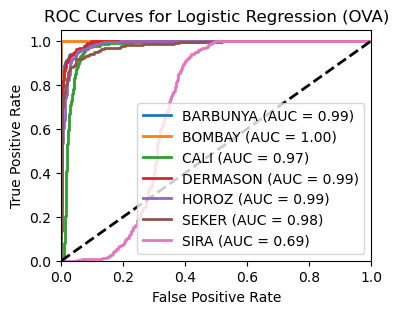


ROC-AUC Deƒüerleri - Logistic Regression:
BARBUNYA: 0.9938
BOMBAY: 1.0000
CALI: 0.9701
DERMASON: 0.9937
HOROZ: 0.9869
SEKER: 0.9799
SIRA: 0.6906


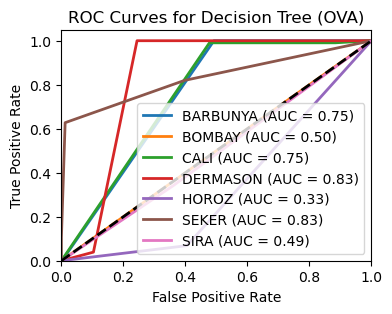


ROC-AUC Deƒüerleri - Decision Tree:
BARBUNYA: 0.7530
BOMBAY: 0.5000
CALI: 0.7546
DERMASON: 0.8311
HOROZ: 0.3319
SEKER: 0.8315
SIRA: 0.4903


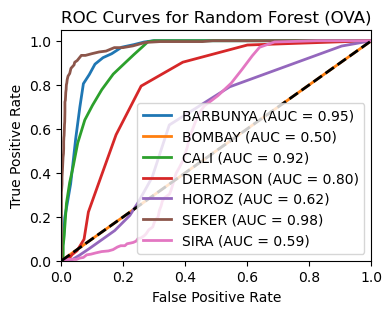


ROC-AUC Deƒüerleri - Random Forest:
BARBUNYA: 0.9467
BOMBAY: 0.5000
CALI: 0.9228
DERMASON: 0.8017
HOROZ: 0.6172
SEKER: 0.9785
SIRA: 0.5931


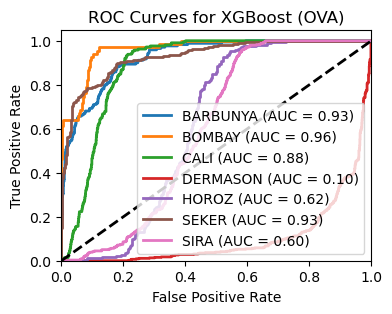


ROC-AUC Deƒüerleri - XGBoost:
BARBUNYA: 0.9261
BOMBAY: 0.9624
CALI: 0.8835
DERMASON: 0.1046
HOROZ: 0.6151
SEKER: 0.9302
SIRA: 0.5967


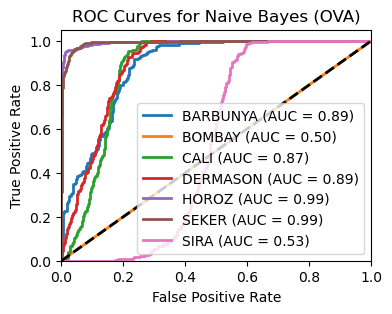


ROC-AUC Deƒüerleri - Naive Bayes:
BARBUNYA: 0.8856
BOMBAY: 0.5000
CALI: 0.8724
DERMASON: 0.8902
HOROZ: 0.9940
SEKER: 0.9925
SIRA: 0.5346


In [96]:
print("\n11. ROC EƒûRƒ∞LERƒ∞ VE SONU√áLARIN RAPORLANMASI")
print("------------------------------------------")
# Ham veri temsili i√ßin en iyi model olan Random Forest i√ßin ROC eƒürilerini √ßizelim
for model_name, model_data in best_models['Ham Veri'].items():
    best_model = model_data['model']
    y_test = model_data['y_test']
    
    # One-vs-All (OVA) yakla≈üƒ±mƒ±yla her sƒ±nƒ±f i√ßin ROC eƒürisi
    plt.figure(figsize=(4, 3))
    n_classes = len(np.unique(y_encoded))
    
    # Olasƒ±lƒ±k tahminleri almak i√ßin
    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_preprocessed[model_data['test_idx']])
        
        # Her sƒ±nƒ±f i√ßin ROC eƒürisi
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
            roc_auc = auc(fpr, tpr)
            class_name = le.classes_[i]
            plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})')
        
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves for {model_name} (OVA)')
        plt.legend(loc="lower right")
        plt.show()
        
        # AUC deƒüerlerini yazdƒ±rma
        print(f"\nROC-AUC Deƒüerleri - {model_name}:")
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
            roc_auc = auc(fpr, tpr)
            class_name = le.classes_[i]
            print(f"{class_name}: {roc_auc:.4f}")

### GENEL ROC AUC PERFORMANS DEƒûERLENDƒ∞RMESƒ∞

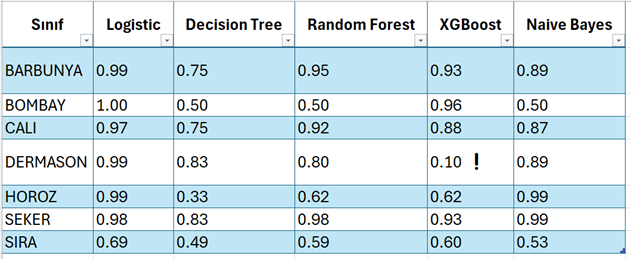

#### SINIF BAZLI DEƒûERLENDƒ∞RME

##### G√º√ßl√º Tahmin Edilen Sƒ±nƒ±flar:
- **BARBUNYA** ve **SEKER** t√ºm modellerde y√ºksek ba≈üarƒ±ya sahip.
- **HOROZ**, Naive Bayes modelinde AUC = 0.99 ile √∂ne √ßƒ±kƒ±yor.

##### Zayƒ±f Tahmin Edilen Sƒ±nƒ±flar:
- **SIRA** sƒ±nƒ±fƒ±, t√ºm modellerde ba≈üarƒ±sƒ±z.
- **BOMBAY**, bir√ßok modelde ≈üansa yakƒ±n AUC (~0.50).
- **DERMASON**, XGBoost'ta ciddi ba≈üarƒ±sƒ±z (AUC = 0.10)

---

#### MODEL BAZLI √ñZET

- **Logistic Regression**: En dengeli ve g√º√ßl√º model. T√ºm sƒ±nƒ±flarda y√ºksek ba≈üarƒ±, SIRA dƒ±≈üƒ±nda.
- **Decision Tree**: Basit yapƒ±sƒ± sƒ±nƒ±flar arasƒ± ayrƒ±mƒ± zorla≈ütƒ±rƒ±yor. HOROZ ve SIRA‚Äôda k√∂t√º sonu√ß.
- **Random Forest**: Ensemble yapƒ±sƒ± sayesinde iyi ama SIRA ve BOMBAY gibi sƒ±nƒ±flarda zayƒ±f.
- **XGBoost**: DERMASON sƒ±nƒ±fƒ±nda ba≈üarƒ±sƒ±z. Diƒüer sƒ±nƒ±flarda √ßok g√º√ßl√º.
- **Naive Bayes**: HOROZ ve SEKER'de √ßok ba≈üarƒ±lƒ±. Ama bazƒ± sƒ±nƒ±flarda d√º≈ü√ºk AUC var.

---

#### GENEL YORUM

- **SIRA** sƒ±nƒ±fƒ± t√ºm modellerde ba≈üarƒ±sƒ±z ‚Üí muhtemelen veri azlƒ±ƒüƒ± veya sƒ±nƒ±flar arasƒ± benzerlik.
- **DERMASON** sƒ±nƒ±fƒ±nda XGBoost‚Äôun hatasƒ± incelenmeli.
- Logistic Regression ve Naive Bayes genel olarak istikrarlƒ±.
- ROC AUC yanƒ±nda Confusion Matrix, F1-score gibi metriklerle desteklenmeli.

---

#### √ñNERƒ∞LER

- Logistic Regression tercih edilebilir.
- SIRA sƒ±nƒ±fƒ± i√ßin veri artƒ±rƒ±mƒ± yapƒ±lmalƒ± (√∂rneƒüin SMOTE).
- DERMASON sƒ±nƒ±fƒ± i√ßin XGBoost √∂zelinde veri kontrol√º yapƒ±lmalƒ±.
- ROC eƒürisi dƒ±≈üƒ±nda precision/recall/F1-score ve confusion matrix metrikleri de deƒüerlendirilmeli.



 ### Performans Tablolarƒ±

In [83]:
# Her veri temsili i√ßin performans tablolarƒ±nƒ± olu≈üturma
for rep_name, models_results in results.items():
    print(f"\nPerformans Tablosu - {rep_name}")
    
    # Tablo ba≈ülƒ±ƒüƒ±
    header = f"{'Model':<20} | {'Accuracy':<15} | {'Precision':<15} | {'Recall':<15} | {'F1 Score':<15}"
    print("-" * len(header))
    print(header)
    print("-" * len(header))
    
    # Model sonu√ßlarƒ±
    for model_name, metrics in models_results.items():
        acc_mean, acc_std = metrics['accuracy']
        prec_mean, prec_std = metrics['precision']
        rec_mean, rec_std = metrics['recall']
        f1_mean, f1_std = metrics['f1']
        
        print(f"{model_name:<20} | "
              f"{acc_mean:.4f}¬±{acc_std:.4f} | "
              f"{prec_mean:.4f}¬±{prec_std:.4f} | "
              f"{rec_mean:.4f}¬±{rec_std:.4f} | "
              f"{f1_mean:.4f}¬±{f1_std:.4f}")
    
    print("-" * len(header))


Performans Tablosu - Ham Veri
--------------------------------------------------------------------------------------------
Model                | Accuracy        | Precision       | Recall          | F1 Score       
--------------------------------------------------------------------------------------------
Logistic Regression  | 0.9268¬±0.0024 | 0.9272¬±0.0024 | 0.9268¬±0.0024 | 0.9269¬±0.0024
Decision Tree        | 0.9063¬±0.0044 | 0.9071¬±0.0038 | 0.9063¬±0.0044 | 0.9064¬±0.0043
Random Forest        | 0.9240¬±0.0052 | 0.9242¬±0.0051 | 0.9240¬±0.0052 | 0.9239¬±0.0051
XGBoost              | 0.9273¬±0.0026 | 0.9277¬±0.0028 | 0.9273¬±0.0026 | 0.9273¬±0.0026
Naive Bayes          | 0.9014¬±0.0062 | 0.9029¬±0.0061 | 0.9014¬±0.0062 | 0.9016¬±0.0060
--------------------------------------------------------------------------------------------

Performans Tablosu - PCA Veri
--------------------------------------------------------------------------------------------
Model                | Accur

#### MODEL PERFORMANSI ‚Äì DOƒûRULUK, HASSASƒ∞YET, DUYARLILIK VE F1 SKOR KAR≈ûILA≈ûTIRMASI

Veri seti √º√ß farklƒ± bi√ßimde modellenmi≈ütir:
- **Ham Veri**
- **PCA ile boyut indirgeme uygulanmƒ±≈ü veri**
- **LDA ile boyut indirgeme uygulanmƒ±≈ü veri**

A≈üaƒüƒ±da her veri tipi i√ßin 5 modelin Accuracy, Precision, Recall ve F1 Score ortalamalarƒ± ve standart sapmalarƒ± yer almaktadƒ±r:

 

#### Performans √ñzeti ‚Äì **Ham Veri**

| Model               | Accuracy      | Precision     | Recall        | F1 Score      |
|--------------------|---------------|---------------|---------------|---------------|
| Logistic Regression | 0.9268¬±0.0024 | 0.9272¬±0.0024 | 0.9268¬±0.0024 | 0.9269¬±0.0024 |
| Decision Tree       | 0.9063¬±0.0044 | 0.9071¬±0.0038 | 0.9063¬±0.0044 | 0.9064¬±0.0043 |
| Random Forest       | 0.9240¬±0.0052 | 0.9242¬±0.0051 | 0.9240¬±0.0052 | 0.9239¬±0.0051 |
| XGBoost             | **0.9273¬±0.0026** | **0.9277¬±0.0028** | **0.9273¬±0.0026** | **0.9273¬±0.0026** |
| Naive Bayes         | 0.9014¬±0.0062 | 0.9029¬±0.0061 | 0.9014¬±0.0062 | 0.9016¬±0.0060 |

**Analiz**: Ham veriyle en y√ºksek performansƒ± **XGBoost** g√∂stermektedir. Logistic Regression ve Random Forest da olduk√ßa ba≈üarƒ±lƒ±dƒ±r. Naive Bayes daha sade yapƒ±sƒ±yla d√º≈ü√ºk kalmƒ±≈ütƒ±r.


#### Performans √ñzeti ‚Äì **PCA ile Boyut ƒ∞ndirgeme**

| Model               | Accuracy      | Precision     | Recall        | F1 Score      |
|--------------------|---------------|---------------|---------------|---------------|
| Logistic Regression | 0.8826¬±0.0036 | 0.8828¬±0.0034 | 0.8826¬±0.0036 | 0.8821¬±0.0036 |
| Decision Tree       | 0.8650¬±0.0081 | 0.8657¬±0.0073 | 0.8650¬±0.0081 | 0.8645¬±0.0081 |
| Random Forest       | 0.8863¬±0.0033 | 0.8865¬±0.0031 | 0.8863¬±0.0033 | 0.8856¬±0.0032 |
| XGBoost             | **0.8873¬±0.0059** | **0.8873¬±0.0054** | **0.8873¬±0.0059** | **0.8865¬±0.0058** |
| Naive Bayes         | 0.8716¬±0.0043 | 0.8726¬±0.0051 | 0.8716¬±0.0043 | 0.8699¬±0.0043 |

**Analiz**: PCA sonrasƒ±nda doƒüruluklar az da olsa d√º≈ü√ºyor. Yine de XGBoost birinciliƒüi koruyor. √ñzellikle Random Forest ve Logistic Regression g√º√ßl√º kalmaya devam ediyor.

 #### üîπ Performans √ñzeti ‚Äì **LDA ile Boyut ƒ∞ndirgeme**

| Model               | Accuracy      | Precision     | Recall        | F1 Score      |
|--------------------|---------------|---------------|---------------|---------------|
| Logistic Regression | 0.8208¬±0.0046 | 0.8201¬±0.0046 | 0.8208¬±0.0046 | 0.8190¬±0.0054 |
| Decision Tree       | 0.8358¬±0.0060 | 0.8369¬±0.0057 | 0.8358¬±0.0060 | 0.8359¬±0.0060 |
| Random Forest       | **0.8599¬±0.0040** | **0.8605¬±0.0039** | **0.8599¬±0.0040** | **0.8598¬±0.0040** |
| XGBoost             | 0.8578¬±0.0048 | 0.8585¬±0.0045 | 0.8578¬±0.0048 | 0.8576¬±0.0051 |
| Naive Bayes         | 0.7975¬±0.0064 | 0.7935¬±0.0068 | 0.7975¬±0.0064 | 0.7852¬±0.0074 |

 **Analiz**: LDA ile doƒüruluk daha fazla d√º≈ü√ºyor. Fakat Random Forest ve XGBoost bu d√º≈ü√ºk boyutlu temsilde bile √∂ne √ßƒ±kƒ±yor. Naive Bayes en d√º≈ü√ºk ba≈üarƒ±yƒ± g√∂steriyor.


#### GENEL SONU√á

- **En ba≈üarƒ±lƒ± model: XGBoost** (Ham ve PCA verilerinde)
- **En dengeli model: Logistic Regression**
- **LDA sonrasƒ± en dayanƒ±klƒ± model: Random Forest**
- **Naive Bayes**, d√º≈ü√ºk boyutlarda kayƒ±p ya≈üƒ±yor.
- Boyut indirgeme i≈ülemleri model doƒüruluƒüunu genellikle **bir miktar d√º≈ü√ºr√ºyor**.

Bu tabloyu ROC analizleriyle birlikte deƒüerlendirirsek:
- XGBoost sƒ±nƒ±flandƒ±rƒ±cƒ± g√º√ßl√º ama **DERMASON** gibi sƒ±nƒ±flarda sapabilir.
- Logistic Regression, hem ROC hem klasik metriklerde dengeli bir performans sunmaktadƒ±r.


### En ƒ∞yi Model ve Veri Temsili


En ba≈üarƒ±lƒ± model ve veri temsili kombinasyonu:
Model: XGBoost, Veri Temsili: Ham Veri, Accuracy: 0.9273


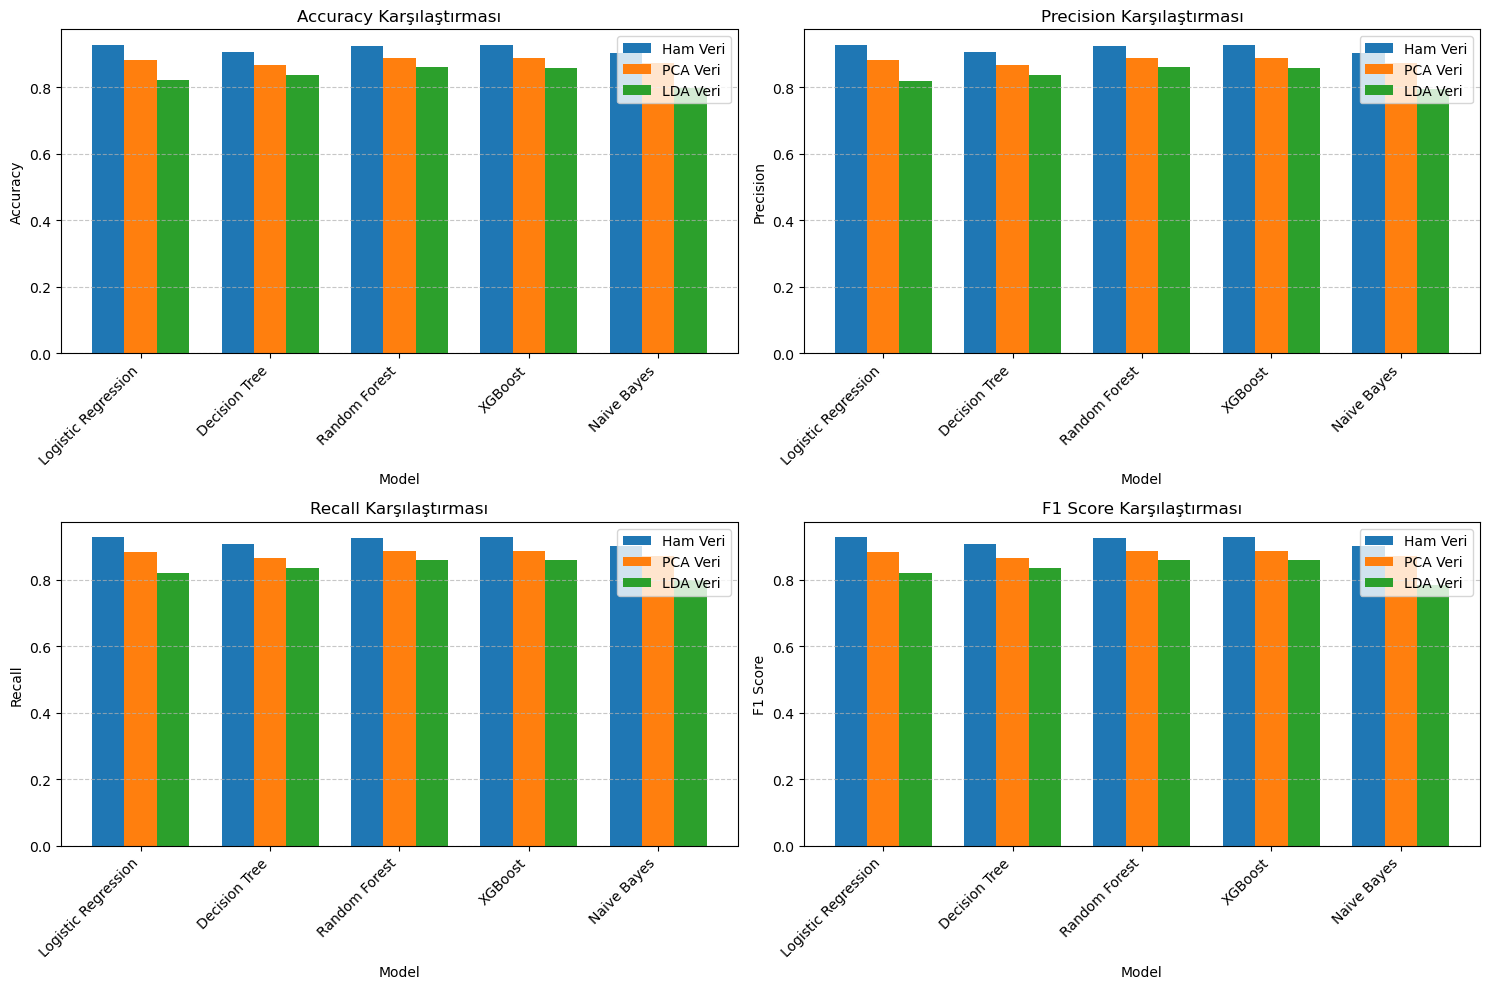

In [84]:
# En iyi model ve veri temsili kombinasyonunu bulma
best_acc = 0
best_model = ""
best_rep = ""

for rep_name, models_results in results.items():
    for model_name, metrics in models_results.items():
        acc_mean, _ = metrics['accuracy']
        if acc_mean > best_acc:
            best_acc = acc_mean
            best_model = model_name
            best_rep = rep_name

print(f"\nEn ba≈üarƒ±lƒ± model ve veri temsili kombinasyonu:")
print(f"Model: {best_model}, Veri Temsili: {best_rep}, Accuracy: {best_acc:.4f}")

# H√ºcre 23: Model Kar≈üƒ±la≈ütƒ±rma Grafiƒüi
# G√∂rselle≈ütirme: Her veri temsili i√ßin model kar≈üƒ±la≈ütƒ±rmalarƒ±
plt.figure(figsize=(15, 10))

# Model isimlerini ve veri temsillerini √ßƒ±karma
model_names = list(models.keys())
representation_names = list(representations.keys())

# Alt grafikler
metrics = ['accuracy', 'precision', 'recall', 'f1']
metric_titles = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, (metric, title) in enumerate(zip(metrics, metric_titles)):
    plt.subplot(2, 2, i+1)
    
    # Her veri temsili i√ßin verileri hazƒ±rlama
    data = []
    for rep_name in representation_names:
        rep_data = []
        for model_name in model_names:
            rep_data.append(results[rep_name][model_name][metric][0])  # Ortalama deƒüer
        data.append(rep_data)
    
    # √áubuk grafik
    x = np.arange(len(model_names))
    width = 0.25
    
    for j, (rep_name, rep_data) in enumerate(zip(representation_names, data)):
        plt.bar(x + (j-1)*width, rep_data, width, label=rep_name)
    
    plt.xlabel('Model')
    plt.ylabel(title)
    plt.title(f'{title} Kar≈üƒ±la≈ütƒ±rmasƒ±')
    plt.xticks(x, model_names, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### MODEL BA≈ûARISI G√ñRSEL KAR≈ûILA≈ûTIRMASI ‚Äì Accuracy, Precision, Recall, F1

A≈üaƒüƒ±daki g√∂rsellerde √º√ß farklƒ± veri temsili (Ham, PCA, LDA) i√ßin her bir modelin d√∂rt temel metriƒüi kar≈üƒ±la≈ütƒ±rmalƒ± olarak g√∂sterilmi≈ütir.

#### En Ba≈üarƒ±lƒ± Kombinasyon
**Model:** XGBoost  
**Veri Temsili:** Ham Veri  
**Accuracy:** 0.9273

Bu sonu√ß, hem ROC eƒürisi analizinde hem de klasik sƒ±nƒ±flandƒ±rma metriklerinde XGBoost'un g√º√ßl√º bir genel performans sergilediƒüini doƒürulamaktadƒ±r.


#### Accuracy Kar≈üƒ±la≈ütƒ±rmasƒ±
- XGBoost ve Logistic Regression, **Ham Veri** ile en y√ºksek ba≈üarƒ±yƒ± g√∂steren modellerdir.
- LDA ile elde edilen doƒüruluk, t√ºm modellerde g√∂rece daha d√º≈ü√ºkt√ºr.
- Random Forest ve Logistic Regression da genel olarak saƒülam performans g√∂stermektedir.

#### Precision Kar≈üƒ±la≈ütƒ±rmasƒ±
- XGBoost, Random Forest ve Logistic Regression √∂ne √ßƒ±kƒ±yor.
- PCA sonrasƒ± precision puanlarƒ±nda kƒ±smi d√º≈ü√º≈ü g√∂zlemlenmekte.
- Naive Bayes √∂zellikle LDA temsili ile en d√º≈ü√ºk deƒüere sahip.

#### Recall Kar≈üƒ±la≈ütƒ±rmasƒ±
- Yine XGBoost ve Logistic Regression √∂ne √ßƒ±kƒ±yor.
- Naive Bayes LDA ile zayƒ±f, ancak PCA ile daha dengeli.
- LDA verisiyle √ßalƒ±≈ümak model hassasiyetini azaltƒ±yor gibi g√∂r√ºn√ºyor.

#### F1 Score Kar≈üƒ±la≈ütƒ±rmasƒ±
- XGBoost ve Logistic Regression ham veride **en y√ºksek F1 skoru**nu veriyor.
- LDA ile t√ºm modellerin F1 skorlarƒ± d√º≈ü√ºyor.
- Naive Bayes modeli genel olarak en d√º≈ü√ºk F1 skorunu √ºretmi≈ü.


#### √ñzet Yorum

| Kriter                  | G√∂zlem |
|-------------------------|--------|
| **En iyi genel model**  | ‚úÖ XGBoost (Ham Veri) |
| **En stabil model**     | ‚úÖ Logistic Regression |
| **LDA ile en az etkilenen** | üü° Random Forest |
| **LDA'da en k√∂t√º performans** | ‚ùå Naive Bayes |
| **Veri indirgeme etkisi** | PCA < LDA; genellikle metriklerde d√º≈ü√º≈ü var |


### √ñzellik √ñnem Analizi

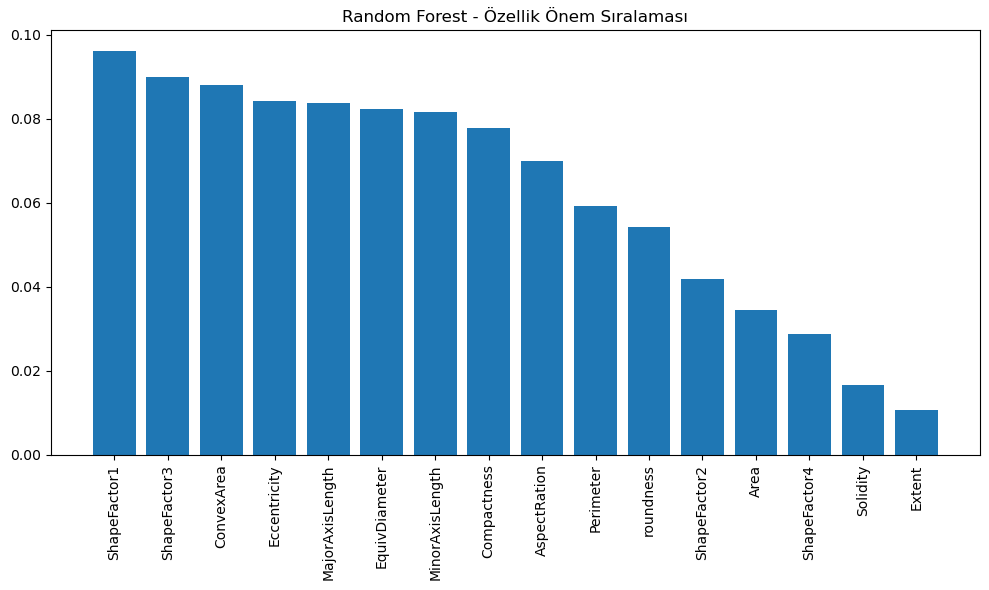


√ñzellik √ñnem Sƒ±ralamasƒ± (Random Forest):
1. ShapeFactor1: 0.0963
2. ShapeFactor3: 0.0899
3. ConvexArea: 0.0880
4. Eccentricity: 0.0842
5. MajorAxisLength: 0.0838
6. EquivDiameter: 0.0823
7. MinorAxisLength: 0.0817
8. Compactness: 0.0779
9. AspectRation: 0.0700
10. Perimeter: 0.0593
11. roundness: 0.0542
12. ShapeFactor2: 0.0419
13. Area: 0.0345
14. ShapeFactor4: 0.0288
15. Solidity: 0.0165
16. Extent: 0.0108


In [85]:
# √ñzellik √∂nem analizi (Random Forest i√ßin)
if 'Random Forest' in best_models['Ham Veri']:
    rf_model = best_models['Ham Veri']['Random Forest']['model']
    feature_importances = rf_model.feature_importances_
    
    # √ñzellik √∂nemlerini sƒ±rala
    feature_names = X.columns
    indices = np.argsort(feature_importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.title('Random Forest - √ñzellik √ñnem Sƒ±ralamasƒ±')
    plt.tight_layout()
    plt.show()
    
    print("\n√ñzellik √ñnem Sƒ±ralamasƒ± (Random Forest):")
    for i in range(X.shape[1]):
        print(f"{i+1}. {feature_names[indices[i]]}: {feature_importances[indices[i]]:.4f}")

### Sonu√ß Deƒüerlendirmesi

In [86]:
print("\nSONU√á DEƒûERLENDƒ∞RMESƒ∞:")
print("--------------------")
print("Fasulye t√ºrlerinin sƒ±nƒ±flandƒ±rƒ±lmasƒ±nda ba≈üarƒ±lƒ± bir makine √∂ƒürenmesi pipeline'ƒ± geli≈ütirilmi≈ütir.")
print("Yapƒ±lan analizler sonucunda:")
print(f"1. En ba≈üarƒ±lƒ± model: {best_model}")
print(f"2. En ba≈üarƒ±lƒ± veri temsili: {best_rep}")
print(f"3. Elde edilen en y√ºksek doƒüruluk: {best_acc:.4f}")
print("\nBu t√ºr √ßalƒ±≈ümalar, tarƒ±m sekt√∂r√ºnde otomatik sƒ±nƒ±flandƒ±rma ve kalite kontrol sistemleri i√ßin")
print("√∂nemli bir temel olu≈üturmaktadƒ±r. Geli≈ütirilen modelin pratik uygulamalarda kullanƒ±labilmesi i√ßin")
print("ger√ßek zamanlƒ± g√∂r√ºnt√º i≈üleme sistemleriyle entegrasyonu gelecek √ßalƒ±≈ümalarda ele alƒ±nabilir.")


SONU√á DEƒûERLENDƒ∞RMESƒ∞:
--------------------
Fasulye t√ºrlerinin sƒ±nƒ±flandƒ±rƒ±lmasƒ±nda ba≈üarƒ±lƒ± bir makine √∂ƒürenmesi pipeline'ƒ± geli≈ütirilmi≈ütir.
Yapƒ±lan analizler sonucunda:
1. En ba≈üarƒ±lƒ± model: XGBoost
2. En ba≈üarƒ±lƒ± veri temsili: Ham Veri
3. Elde edilen en y√ºksek doƒüruluk: 0.9273

Bu t√ºr √ßalƒ±≈ümalar, tarƒ±m sekt√∂r√ºnde otomatik sƒ±nƒ±flandƒ±rma ve kalite kontrol sistemleri i√ßin
√∂nemli bir temel olu≈üturmaktadƒ±r. Geli≈ütirilen modelin pratik uygulamalarda kullanƒ±labilmesi i√ßin
ger√ßek zamanlƒ± g√∂r√ºnt√º i≈üleme sistemleriyle entegrasyonu gelecek √ßalƒ±≈ümalarda ele alƒ±nabilir.
